# PARCIAL FINAL:

Presentado por: Angie Vanesa Guerrero Bertel

Profesor: Lihki Rubio

Fecha: 30/09/2023

- LIBRERÍAS

In [21]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
X, y = mglearn.datasets.make_forge()
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
#Importe la librería ScikitLearn específicamente el algoritmo de LOF
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import chi2_contingency

- Importamos la base de datos sobre detención de fraude

In [22]:
archivo_csv = "train_transaction.csv"
df = pd.read_csv(archivo_csv)
print('All data shape: ', df.shape)
df.head()

All data shape:  (590540, 394)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

# ANÁLISIS EXPLORATORIO:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


- Número de observaciones en la base de datos: 

In [24]:
print('Número de observaciones: ', df.shape[0])

Número de observaciones:  590540


- Se tienen 394 atributos, de los cuales 380 son numéricos y 14 son categóricos.

In [25]:
df.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2  ...          V330           V331  \
count  524834.000000  524834.000000  ...  82351.000000   82351.000000   
mean      290.733794      86.800630  ...      0.775874     721.741883   
std       101.741072       2.690623  ...      4.727971    6217.223583   
min       100.000000      10.000000  ...      0.000000       0.000000   
25%       204.000000      87.000000  ...      0.000000       0.000000   
50%       299.000000      87.000000  ...      0.000000       0.000000   
75%       330.000000      87.000000  ...      0.000000       0.000000   
max       540.000000     102.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 380 columns]

In [87]:
data_NA = df.isna().sum()
data_NA

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

# selección de variables independientes ( mínimo 4)

- Variable respuesta: isFraud---> categórica
- Variables independientes: TransactionAmt, ProductCD, card1, card4

In [34]:
nuevo_df = df.loc[:, ['isFraud','TransactionAmt', 'ProductCD', 'card1', 'card4']]

In [35]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         590540 non-null  int64  
 1   TransactionAmt  590540 non-null  float64
 2   ProductCD       590540 non-null  object 
 3   card1           590540 non-null  int64  
 4   card4           588963 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 22.5+ MB


seleccionando como variables independientes "TransactionAmt" , "ProductCD ", "card1", "card4", tenemos una data de 590540 observaciones, la única variable independiente con valores faltantes es 'card4', la cual es categórica y tiene solo 588963 registros. 

- Estadística descriptiva: Media, desviasión estándar, mínimo, máximo, cuartiles

In [36]:
nuevo_df.describe().T

count         mean          std       min       25%  \
isFraud         590540.0     0.034990     0.183755     0.000     0.000   
TransactionAmt  590540.0   135.027176   239.162522     0.251    43.321   
card1           590540.0  9898.734658  4901.170153  1000.000  6019.000   

                     50%      75%        max  
isFraud            0.000      0.0      1.000  
TransactionAmt    68.769    125.0  31937.391  
card1           9678.000  14184.0  18396.000

Podemos ver que las variables transactionAmt, TransactionDT y card1 tienen diferentes escalas de medida. 

TransactionAmt --> tiene una media de 135,027 con una desviación estándar de 239.16.Vemos que el 50% de los datos tienen un registro igual o inferior a 68.769. 

card1--> tiene una media de 9898,73 con una desviación estándar de 4901,17. vemos que el valor mínimo es de 1000 y máximo de 18396. Un 50% de los datos tienen un registro en card1 por debajo de la media. 


- Conteo de datos faltantes:

In [37]:
all_data_NA = nuevo_df.isna().sum()
pd.concat([all_data_NA], axis=1, sort = False, keys = [ 'All NA'])

All NA
isFraud              0
TransactionAmt       0
ProductCD            0
card1                0
card4             1577

Vemos que la columna "card4" tiene 1577 datos faltantes.

- Porcentaje de datos faltantes:

In [40]:
porcentaje_faltantes_por_columna = ((all_data_NA / len(nuevo_df)) * 100)
porcentaje_faltantes_por_columna

isFraud           0.000000
TransactionAmt    0.000000
ProductCD         0.000000
card1             0.000000
card4             0.267044
dtype: float64

vemos que el 26,70% de los datos tienen registros faltantes en la variable "card4"

# Histogramas y diagramas de barras

- Variable respuesta: isFraud

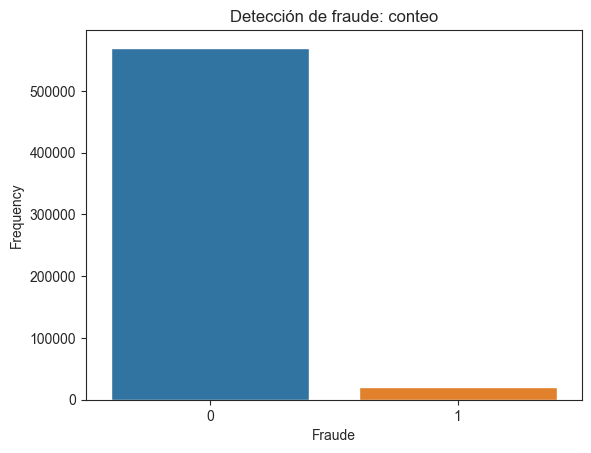

In [42]:
sns.set_style("ticks")
plt.title('Detección de fraude: conteo')
sns.countplot(x=nuevo_df.isFraud)
plt.xlabel('Fraude')
plt.ylabel('Frequency')
plt.show()

Vemos que la muestra está bastante desbalanceada; teniendo pocos registros de fraude.

- variables independientes categóricas: 'card4' y 'ProductCD'

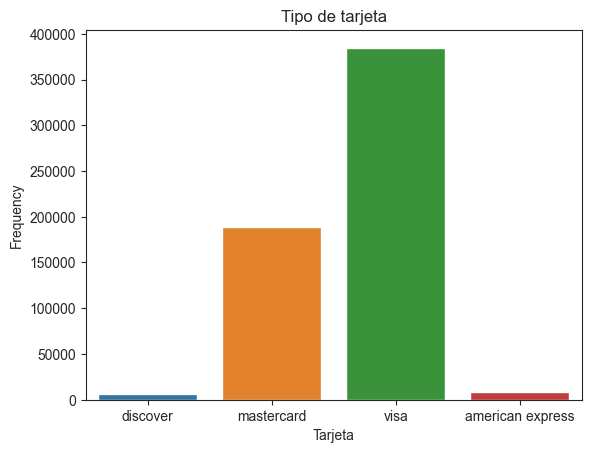

In [43]:
sns.set_style("ticks")
plt.title('Tipo de tarjeta')
sns.countplot(x=nuevo_df.card4)
plt.xlabel('Tarjeta')
plt.ylabel('Frequency')
plt.show()

El Diagrama de barras nos muestra que de los registros, la mayoría tiene tarjeta de crédito visa, seguida de mastercard. la tarjeta tipo discover es de la que se tiene menos registros. 

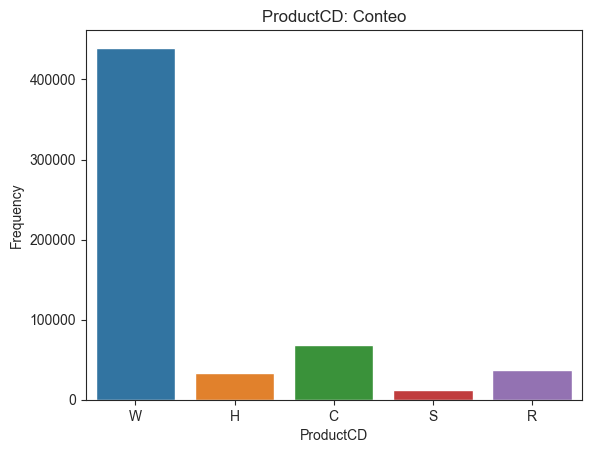

In [45]:
sns.set_style("ticks")
plt.title('ProductCD: Conteo')
sns.countplot(x=nuevo_df.ProductCD)
plt.xlabel('ProductCD')
plt.ylabel('Frequency')
plt.show()

con respecto a la variable 'ProductCD' , el mayor registro es 'W', seguido de 'C' y 'R'. Con menos registros está 'S'

- Histogramas:

Variables numéricas: 'TransactionAmt' y 'card1'

In [60]:
nuevo_df.head()

isFraud  TransactionAmt ProductCD  card1       card4
0        0            68.5         W  13926    discover
1        0            29.0         W   2755  mastercard
2        0            59.0         W   4663        visa
3        0            50.0         W  18132  mastercard
4        0            50.0         H   4497  mastercard

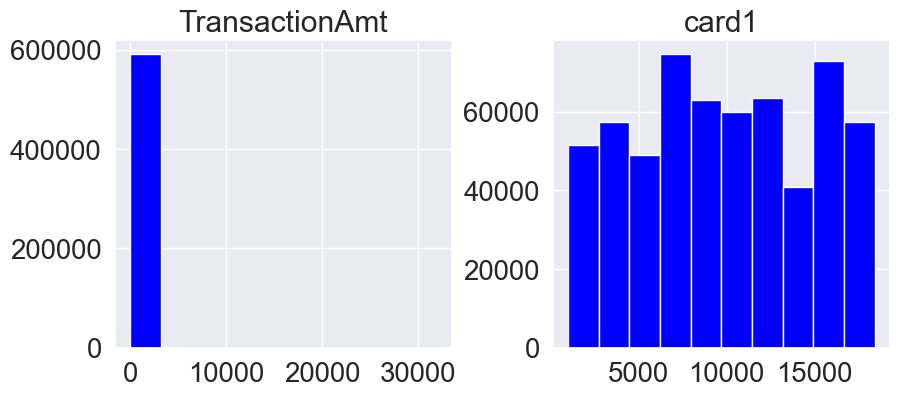

In [63]:
sns.set(font_scale=1.8)
nuevo_df.iloc[: , 1:].hist(figsize = (10,4), color = 'Blue');

Vemos que las variables TransactionAmt y card1 no siguen una distribución normal. 

- Análisis de simetría, datos atípicos y dispersión:


- Variables numéricas: 


Column:  TransactionAmt
Skew: 14.37
Kurtosis:  1123.96


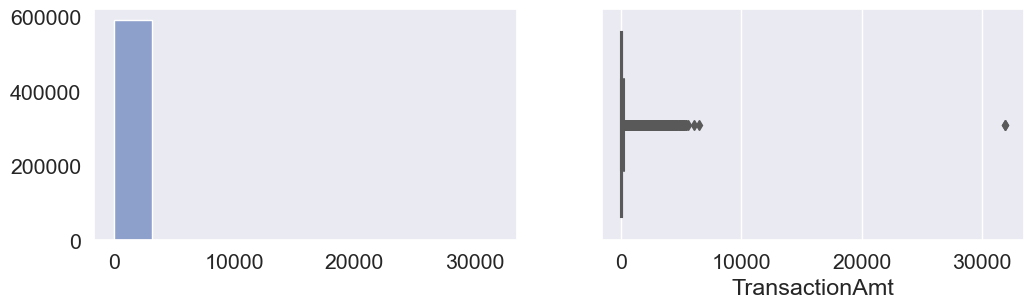

Column:  card1
Skew: -0.04
Kurtosis:  -1.14


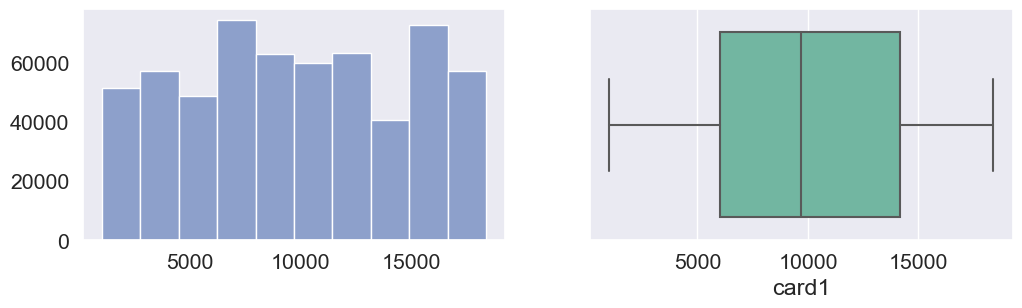

In [69]:
num_cols=['TransactionAmt', 'card1']
custom_palette = sns.color_palette("Set2")
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(nuevo_df[col].skew(), 2))
    print('Kurtosis: ', round(nuevo_df[col].kurtosis(), 2))
    plt.figure(figsize = (12, 3))
    plt.subplot(1, 2, 1)
    nuevo_df[col].hist(grid=False, color=custom_palette[2]) #sin fondo cuadriculado y primer color de los colores personalizados
    plt.subplot(1, 2, 2)
    sns.boxplot(x=nuevo_df[col], palette='Set2')
    plt.show()

vemos que la variable card1 tiene un leve sesgo negativo (Mayor peso en la cola derecha de la distribución ), mientras que la variable 'TransactionAmt', tiene un sesgo positivo (Mayor peso en la cola izquierda de la distribución), hay una fuerte asimetría y evidentemente no hay normalidad en esta variable: también se visualizan posibles datos atípicos en el boxplot. 

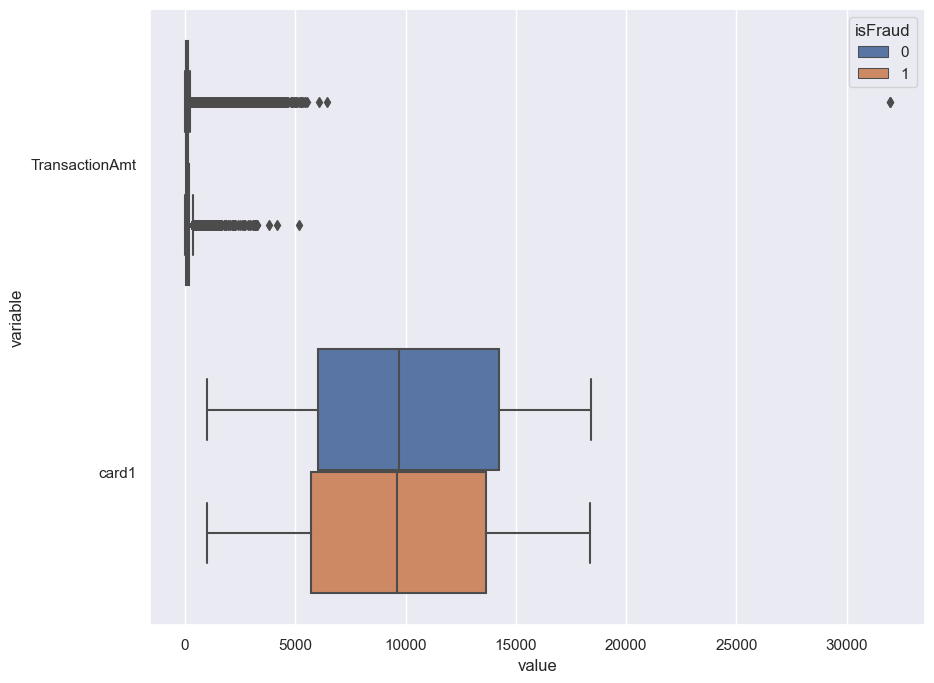

In [75]:
melted_data = pd.melt(nuevo_df, id_vars = "isFraud",value_vars = ['TransactionAmt', 'card1'])
sns.set(font_scale=1)
plt.figure(figsize = (10,8))
sns.boxplot(x = "value", y = "variable", hue="isFraud",data= melted_data);

# Análisis bivariado:


- Variables independientes: TransactionAmt card1

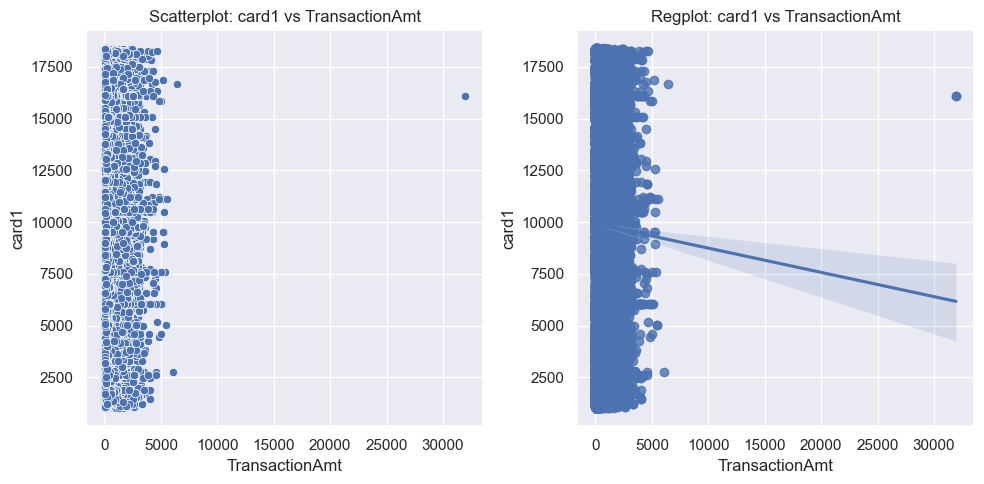

In [84]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=nuevo_df, x='TransactionAmt', y='card1')
plt.title('Scatterplot: card1 vs TransactionAmt')

plt.subplot(1, 2, 2)
sns.regplot(data=nuevo_df, x='TransactionAmt', y='card1')
plt.title('Regplot: card1 vs TransactionAmt')

plt.tight_layout()
plt.show()

El gráfico nos muestra que no hay visualmente una asociación lineal entre las variables transactionAmt y card1

- Variables independientes: 'TransactionDT','TransactionAmt'

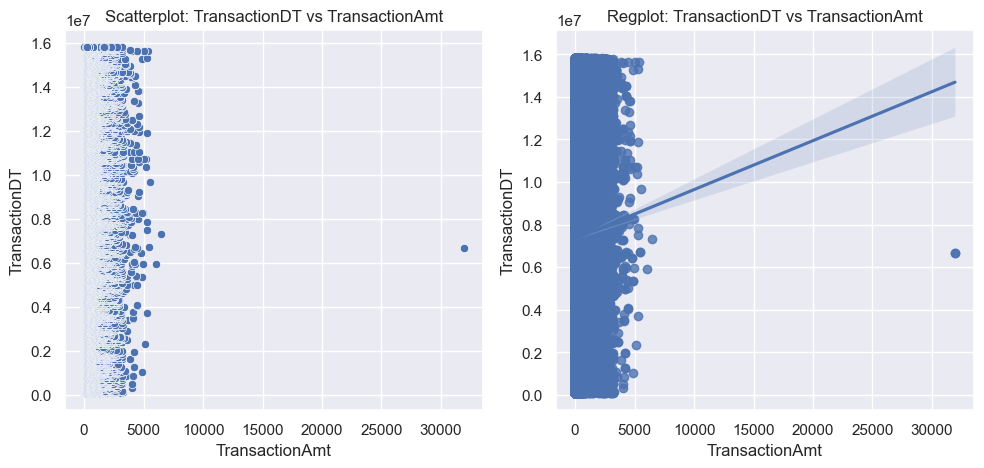

In [89]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='TransactionAmt', y='TransactionDT')
plt.title('Scatterplot: TransactionDT vs TransactionAmt')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='TransactionAmt', y='TransactionDT')
plt.title('Regplot: TransactionDT vs TransactionAmt')

plt.tight_layout()
plt.show()

Para las variables TransactionDT y TransactionAmt , no se ve una asociación lineal entre las dos variables. vemos que muchos datos se concentran en la izquierda, por lo que no es claro si a medida que aumentan transactionAmt aumentan transactionDT

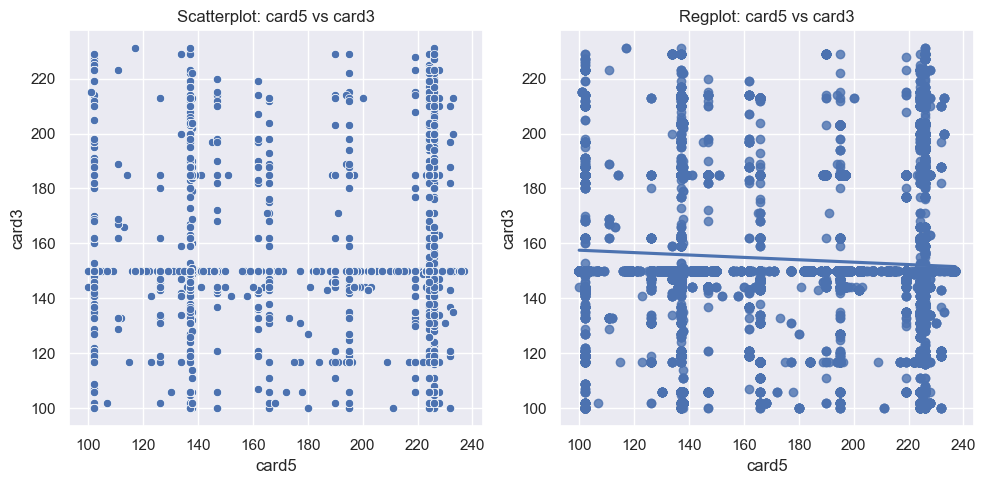

In [90]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='card5', y='card3')
plt.title('Scatterplot: card5 vs card3')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='card5', y='card3')
plt.title('Regplot: card5 vs card3')

plt.tight_layout()
plt.show()

Para las variables card5 y card3 se ve mucha dispersión de los datos. no es clara la tendencia, probablemente a medida que aumentan card5 , card3 disminuye. 


- variables explicativas: card2 y addr1:

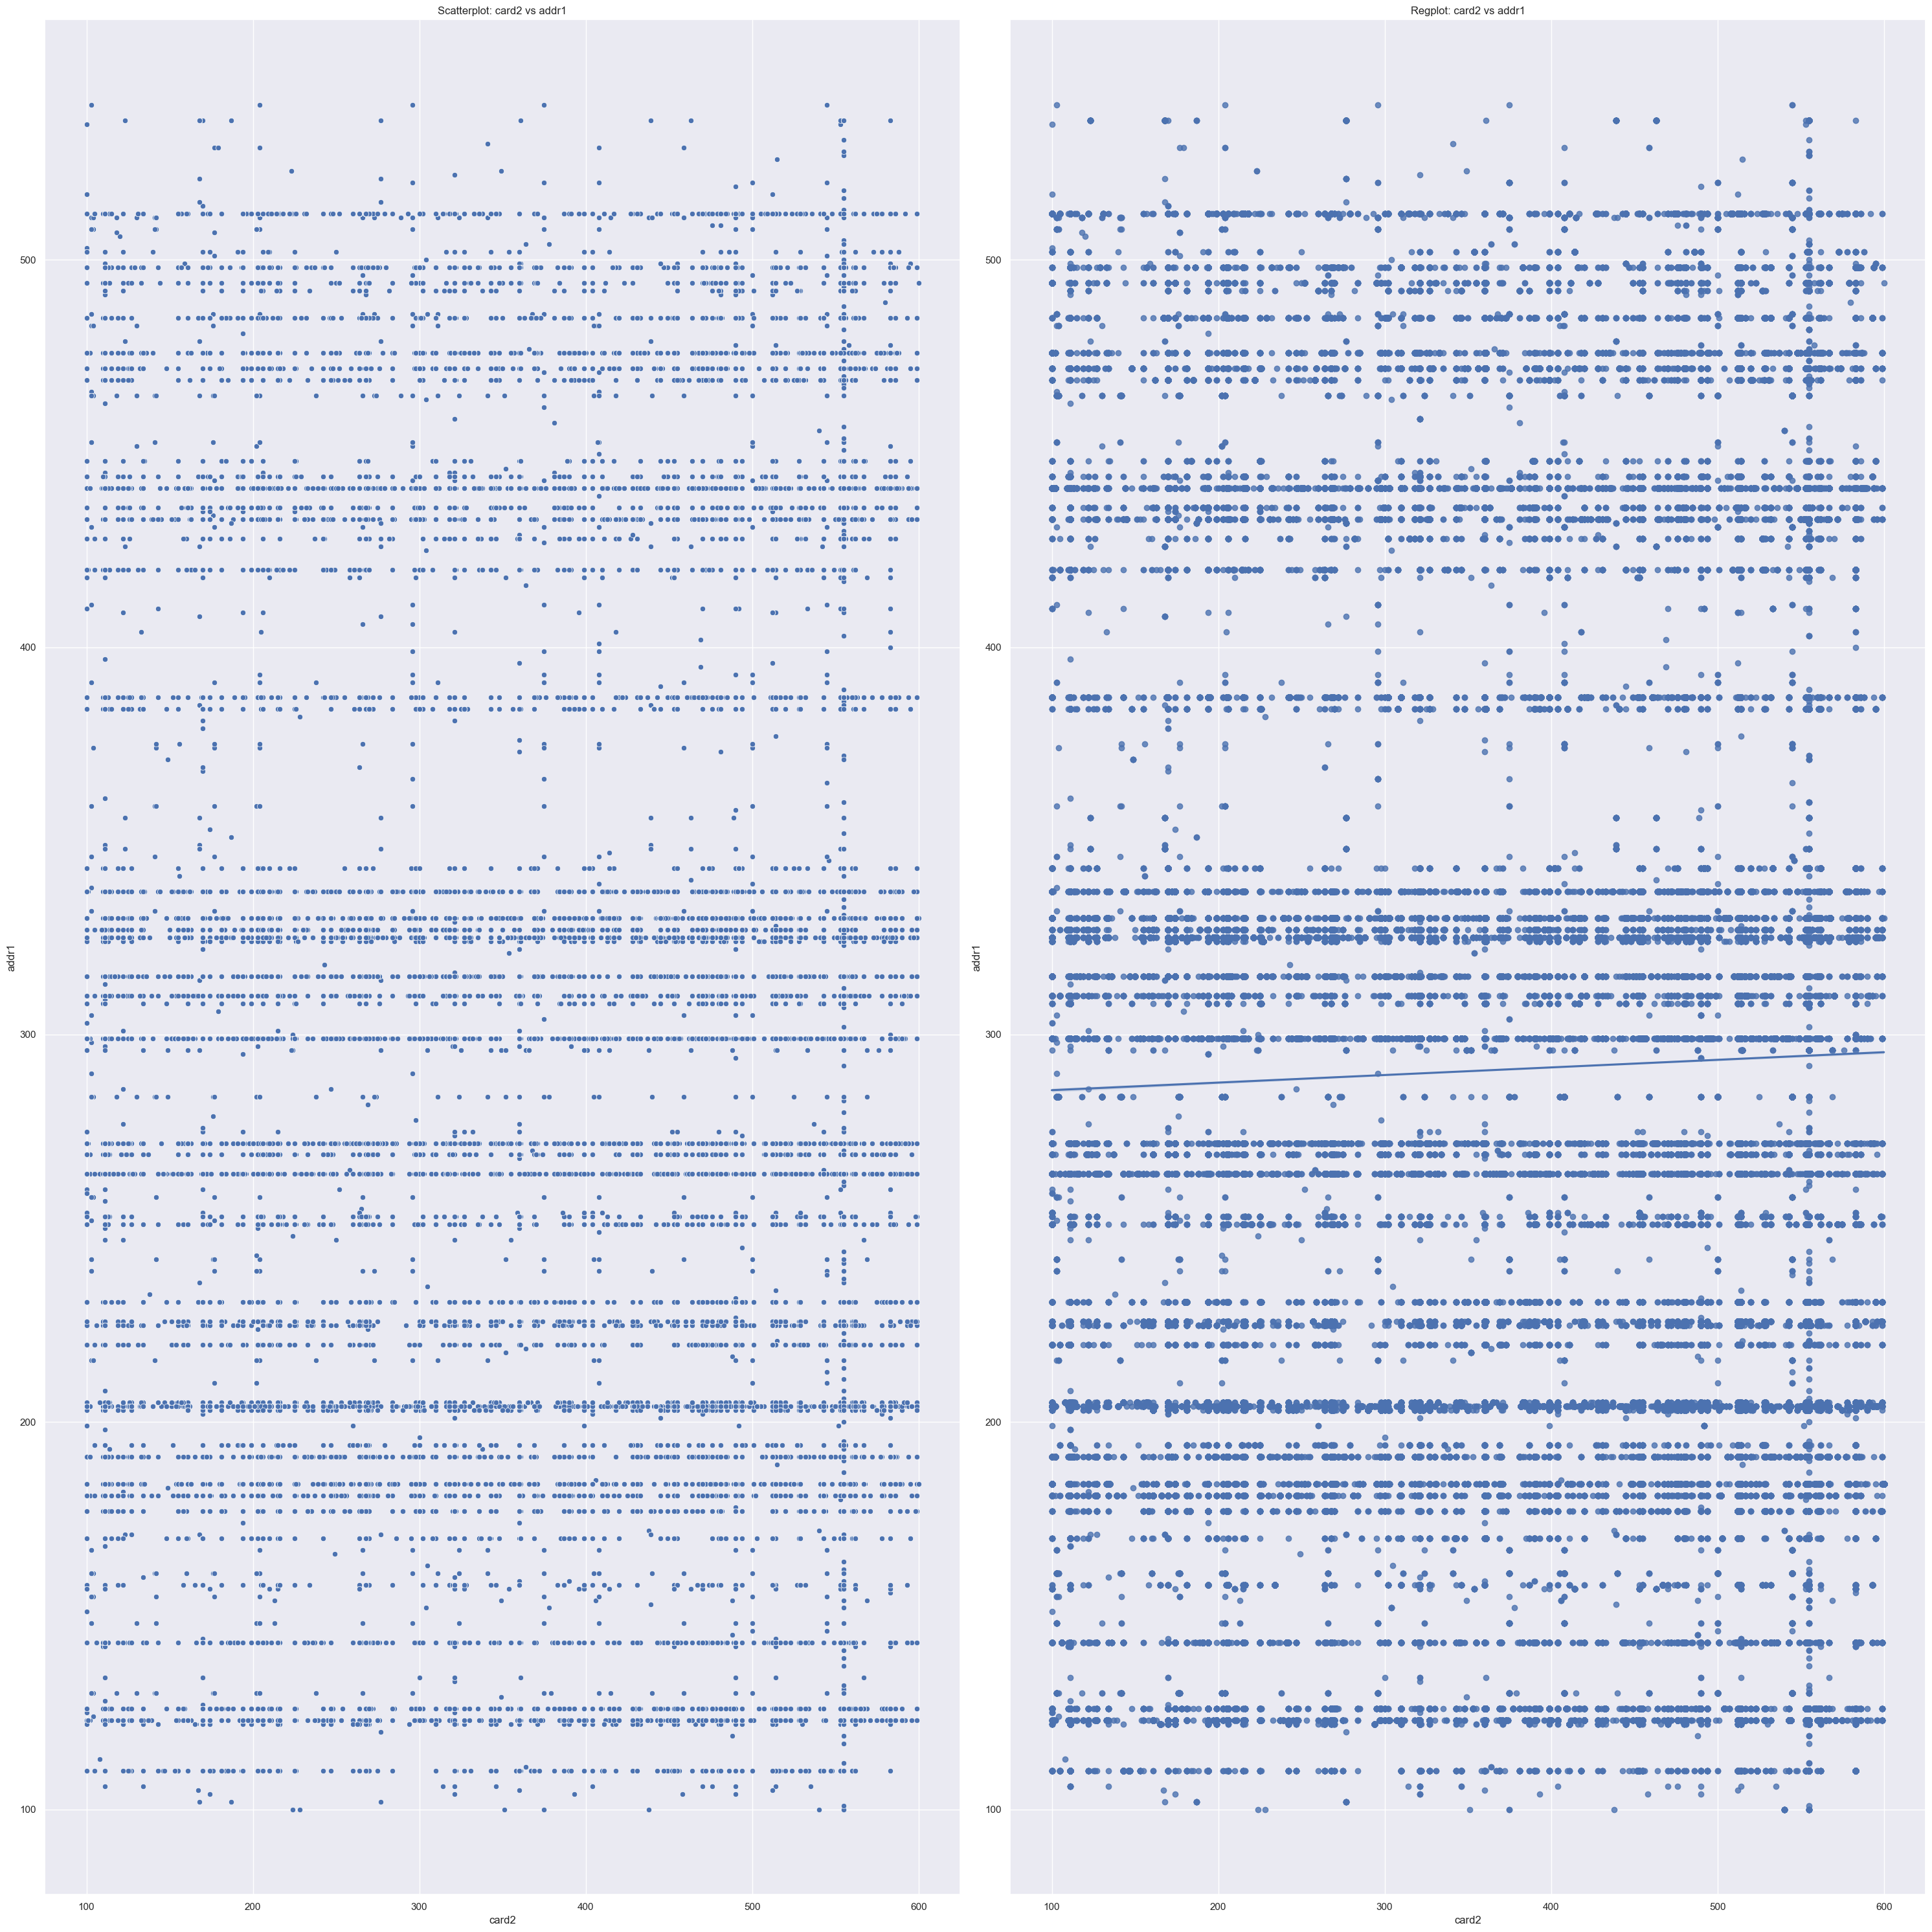

In [92]:
plt.figure(figsize=(30, 30))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='card2', y='addr1')
plt.title('Scatterplot: card2 vs addr1')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='card2', y='addr1')
plt.title('Regplot: card2 vs addr1')

plt.tight_layout()
plt.show()

Los gráficos anteriores no muestran con claridad si hay alguna relación lineal entre las variables. la línea de tendencia nos muestra que a medida que aumenta card2 , addr1 también

# Redución de dimensionalidad

In [132]:
df = pd.read_csv(archivo_csv)
print('All data shape: ', df.shape)
df.head()

All data shape:  (590540, 394)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [133]:
verificacion_NA = df.isna().sum()
verificacion_NA

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [136]:
porcentaje_faltante_col = ((verificacion_NA / len(df)) * 100)
porcentaje_faltante_col

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V335              86.054967
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
Length: 394, dtype: float64

Dado que hay muchas columnas del dataset con datos faltantes que representan una cantidad considerable, he definido un umbral inicial de 30%. aquellas columbas que tengan el 30% de la muestra sin registros serán eliminadas, esto debido a que son demasiados datos faltantes y una imputación de la mediana para tantos datos no sería apropiado

In [146]:
#eliminar las columnas con un porcentaje de valores faltantes mayor al 20%.
umbral = 20  # Puedes ajustar este valor según tus necesidades.

# Lista de columnas que cumplen con el criterio de porcentaje faltante mayor al umbral.
columnas_a_eliminar = porcentaje_faltante_col[porcentaje_faltante_col > umbral].index.tolist()
# Eliminar las columnas del DataFrame original.
df_sin_columnas = df.drop(columns=columnas_a_eliminar)

In [144]:
ver_NA = df_sin_columnas.isna().sum()
ver_NA

TransactionID      0
isFraud            0
TransactionDT      0
TransactionAmt     0
ProductCD          0
                  ..
V317              12
V318              12
V319              12
V320              12
V321              12
Length: 182, dtype: int64

In [145]:
faltante_col = ((ver_NA / len(df_sin_columnas)) * 100)
faltante_col

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
V317              0.002032
V318              0.002032
V319              0.002032
V320              0.002032
V321              0.002032
Length: 182, dtype: float64

Podemos ver que el nuevo dataset con 182 atributos cuenta con una proporción baja de datos faltantes. Se procede a continuar con el tratamiento de los datos faltantes.

# IMPUTACIÓN DE LA MEDIANA: 

Para los datos numéricos se imputará con la mediana aquellos datos faltantes.

In [148]:
df_sin_columnas.describe().T

count          mean           std          min  \
TransactionID   590540.0  3.282270e+06  1.704744e+05  2987000.000   
isFraud         590540.0  3.499001e-02  1.837546e-01        0.000   
TransactionDT   590540.0  7.372311e+06  4.617224e+06    86400.000   
TransactionAmt  590540.0  1.350272e+02  2.391625e+02        0.251   
card1           590540.0  9.898735e+03  4.901170e+03     1000.000   
...                  ...           ...           ...          ...   
V317            590528.0  2.476067e+02  3.980043e+03        0.000   
V318            590528.0  1.621534e+02  2.793344e+03        0.000   
V319            590528.0  1.837248e+01  3.323048e+02        0.000   
V320            590528.0  4.207313e+01  4.734993e+02        0.000   
V321            590528.0  2.832658e+01  3.820532e+02        0.000   

                        25%          50%          75%           max  
TransactionID   3134634.750  3282269.500   3429904.25  3.577539e+06  
isFraud               0.000        0.000         0.00  1.000000e+00  
TransactionDT   3027057.750  7306527.500  11246620.00  1.581113e+07  
TransactionAmt       43.321       68.769       125.00  3.193739e+04  
card1              6019.000     9678.000     14184.00  1.839600e+04  
...                     ...          ...          ...           ...  
V317                  0.000        0.000         0.00  1.340210e+05  
V318                  0.000        0.000         0.00  9.847600e+04  
V319                  0.000        0.000         0.00  1.040600e+05  
V320                  0.000        0.000         0.00  1.040600e+05  
V321                  0.000        0.000         0.00  1.040600e+05  

[178 rows x 8 columns]

In [149]:
catego_cols=df_sin_columnas.select_dtypes(include=['object']).columns
numeri_cols = df_sin_columnas.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(catego_cols)
print("Numerical Variables:")
print(numeri_cols)

Categorical Variables:
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain'], dtype='object')
Numerical Variables:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',

In [151]:
for col in numeri_cols:
    m_norm_loss = df_sin_columnas[col].astype("float").median(axis=0)
    df_sin_columnas[col].replace(np.nan, m_norm_loss, inplace=True)

In [156]:
veri_NA = df_sin_columnas.isna().sum()
veri_NA

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 182, dtype: int64

In [157]:
df_sin_columnas.describe().T

count          mean           std          min  \
TransactionID   590540.0  3.282270e+06  1.704744e+05  2987000.000   
isFraud         590540.0  3.499001e-02  1.837546e-01        0.000   
TransactionDT   590540.0  7.372311e+06  4.617224e+06    86400.000   
TransactionAmt  590540.0  1.350272e+02  2.391625e+02        0.251   
card1           590540.0  9.898735e+03  4.901170e+03     1000.000   
...                  ...           ...           ...          ...   
V317            590540.0  2.476017e+02  3.980003e+03        0.000   
V318            590540.0  1.621501e+02  2.793315e+03        0.000   
V319            590540.0  1.837210e+01  3.323015e+02        0.000   
V320            590540.0  4.207228e+01  4.734945e+02        0.000   
V321            590540.0  2.832601e+01  3.820493e+02        0.000   

                        25%          50%          75%           max  
TransactionID   3134634.750  3282269.500   3429904.25  3.577539e+06  
isFraud               0.000        0.000         0.00  1.000000e+00  
TransactionDT   3027057.750  7306527.500  11246620.00  1.581113e+07  
TransactionAmt       43.321       68.769       125.00  3.193739e+04  
card1              6019.000     9678.000     14184.00  1.839600e+04  
...                     ...          ...          ...           ...  
V317                  0.000        0.000         0.00  1.340210e+05  
V318                  0.000        0.000         0.00  9.847600e+04  
V319                  0.000        0.000         0.00  1.040600e+05  
V320                  0.000        0.000         0.00  1.040600e+05  
V321                  0.000        0.000         0.00  1.040600e+05  

[178 rows x 8 columns]

Ahora, verifiquemos datos faltantes en las variables categóricas:

In [158]:
print(catego_cols)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain'], dtype='object')


# EDA DATASET 2: VELOCIDAD DEL VIENTO

In [95]:
archivo_csv2 = "data_treino_dv_df_2000_2010.csv"
df2 = pd.read_csv(archivo_csv2)
print('All data shape: ', df2.shape)
df2.head()

All data shape:  (87693, 13)


HORA (UTC)  VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))  \
0      12:00                                    0.809017   
1      13:00                                    0.965926   
2      14:00                                    0.891007   
3      15:00                                    0.848048   
4      16:00                                    0.224951   

   VENTO, VELOCIDADE HORARIA (m/s)  UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  \
0                              1.8                                      69.0   
1                              2.7                                      62.0   
2                              2.0                                      56.0   
3                              2.5                                      52.0   
4                              2.4                                      50.0   

   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  \
0                                      60.0   
1                                      55.0   
2                                      50.0   
3                                      44.0   
4                                      43.0   

   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            22.6   
1                                            24.2   
2                                            25.5   
3                                            27.4   
4                                            27.1   

   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            20.7   
1                                            22.5   
2                                            24.3   
3                                            25.0   
4                                            25.5   

   UMIDADE RELATIVA DO AR, HORARIA (%)  \
0                                 61.0   
1                                 55.0   
2                                 51.0   
3                                 44.0   
4                                 46.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)  VENTO, RAJADA MAXIMA (m/s)  \
0                                     0.0                         3.8   
1                                     0.0                         4.7   
2                                     0.0                         4.9   
3                                     0.0                         5.8   
4                                     0.0                         5.8   

   PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              888.2   
1                                              888.4   
2                                              888.4   
3                                              888.1   
4                                              887.4   

   PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  
0                                              887.7   
1                                              888.2   
2                                              888.1   
3                                              887.4   
4                                              886.5

La base de datos de velocidad del viento corresponde a 87693 registros y 13 atributos. 

In [134]:
porcentaje_faltantes = ((verificacion_NA / len(df)) * 100)
porcentaje_faltantes

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V335              86.054967
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
Length: 394, dtype: float64

# Análisis Exploratorio 2:

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

Vemos que no hay datos faltantes , se tiene como variable categórica 'hora', y 12 variables numéricas. 

In [97]:
nuevos_nombres = ['hora', 'viento_direc', 'velocidad', 'AUT_max', 'AUT_min', 'TEMP_MAX', 'TEMP_MIN', 'REL_DO', 'atm', 'prec_total',
                  'Viento_rajmax', 'presion_max', 'presion_min']
df2.columns = nuevos_nombres

In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hora           87693 non-null  object 
 1   viento_direc   87693 non-null  float64
 2   velocidad      87693 non-null  float64
 3   AUT_max        87693 non-null  float64
 4   AUT_min        87693 non-null  float64
 5   TEMP_MAX       87693 non-null  float64
 6   TEMP_MIN       87693 non-null  float64
 7   REL_DO         87693 non-null  float64
 8   atm            87693 non-null  float64
 9   prec_total     87693 non-null  float64
 10  Viento_rajmax  87693 non-null  float64
 11  presion_max    87693 non-null  float64
 12  presion_min    87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


In [101]:
df2.describe().T

count        mean        std    min         25%         50%  \
viento_direc   87693.0    0.405810   0.686247   -1.0   -0.156434    0.788011   
velocidad      87693.0    2.466192   1.313968    0.0    1.500000    2.400000   
AUT_max        87693.0   69.058465  19.640222   12.0   54.000000   72.000000   
AUT_min        87693.0   63.176194  20.166336   10.0   48.000000   64.000000   
TEMP_MAX       87693.0   21.921264   3.721386    9.2   19.200000   21.400000   
TEMP_MIN       87693.0   20.684570   3.513744    8.4   18.400000   20.200000   
REL_DO         87693.0   66.146682  19.992327   10.0   51.000000   68.000000   
atm            87693.0  887.251925   4.012404  863.4  885.300000  887.200000   
prec_total     87693.0    0.160907   1.307515    0.0    0.000000    0.000000   
Viento_rajmax  87693.0    5.161076   2.311157    0.0    3.400000    5.000000   
presion_max    87693.0  887.580724   3.646750  865.3  885.600000  887.500000   
presion_min    87693.0  886.891093   3.564539  862.8  885.000000  886.900000   

                      75%     max  
viento_direc     0.970296     1.0  
velocidad        3.400000    10.0  
AUT_max         87.000000   100.0  
AUT_min         80.000000    98.0  
TEMP_MAX        24.700000    35.3  
TEMP_MIN        23.100000    34.4  
REL_DO          84.000000    99.0  
atm            889.100000  1023.5  
prec_total       0.000000    70.8  
Viento_rajmax    6.800000    24.3  
presion_max    889.300000   913.1  
presion_min    888.800000   910.9

- Estadística descriptiva: Media, desviasión estándar, mínimo, máximo, cuartiles

Del análisis anterior, tenemos que:

La velocidad del viento (m/s) tiene registros mínimos de 0 y máximo de 10, con una velocidad promedio de 2.47m/s. el 75% de los registros son velocidades de viento interiores a 3.4 m/s.

La temperatura máxima y mínima registrada tienen valores promedios similares, siendo la máxima de 21,9 grados y la mínima de 20.68 grados.

los registros de rpesión atmosférica promedio fueron de 887 atmósferas con una desviación de 4.01 atm, con un registro máximo de 1023,5 atm.

Vemos que muchos atributos están en diferentes escalas de medida. 



- Conteo de datos faltantes:

In [103]:
all_NA = df2.isna().sum()
pd.concat([all_NA], axis=1, sort = False, keys = [ 'All NA'])

All NA
hora                0
viento_direc        0
velocidad           0
AUT_max             0
AUT_min             0
TEMP_MAX            0
TEMP_MIN            0
REL_DO              0
atm                 0
prec_total          0
Viento_rajmax       0
presion_max         0
presion_min         0

En la base de datos no se registran datos faltantes. 

# Histograma y Diagrama de barras:

In [116]:
cate_cols=df2.select_dtypes(include=['object']).columns
nume_cols = df2.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cate_cols)
print("Numerical Variables:")
print(nume_cols)

Categorical Variables:
Index(['hora'], dtype='object')
Numerical Variables:
['viento_direc', 'velocidad', 'AUT_max', 'AUT_min', 'TEMP_MAX', 'TEMP_MIN', 'REL_DO', 'atm', 'prec_total', 'Viento_rajmax', 'presion_max', 'presion_min']


Column:  viento_direc
Skew: -0.86
Kurtosis:  -0.82


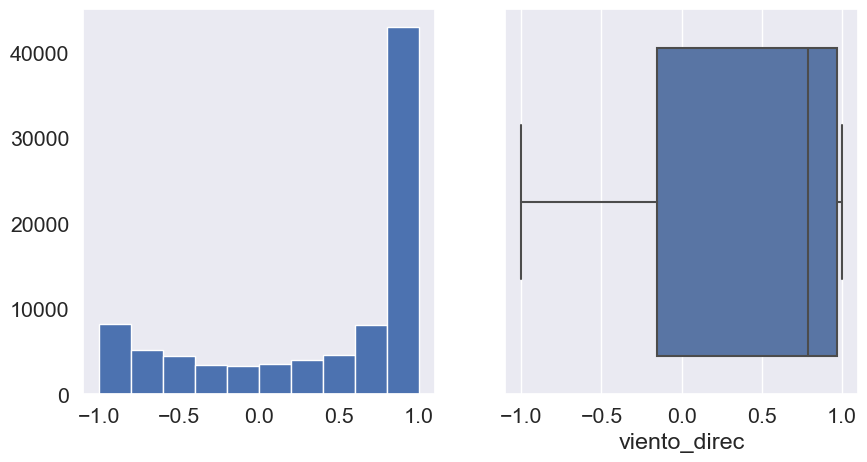

Column:  velocidad
Skew: 0.37
Kurtosis:  -0.11


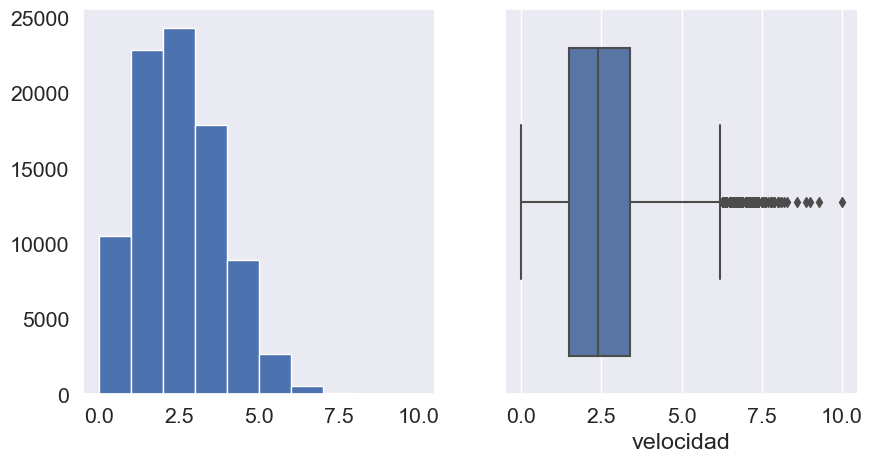

Column:  AUT_max
Skew: -0.48
Kurtosis:  -0.78


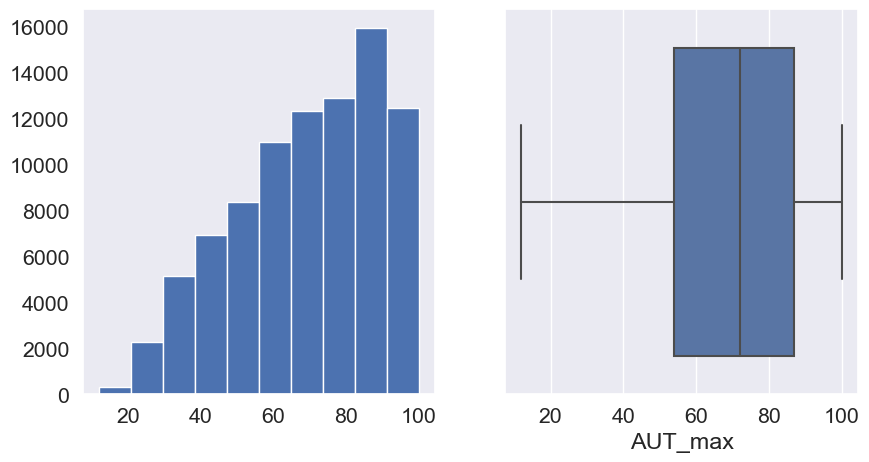

Column:  AUT_min
Skew: -0.23
Kurtosis:  -0.96


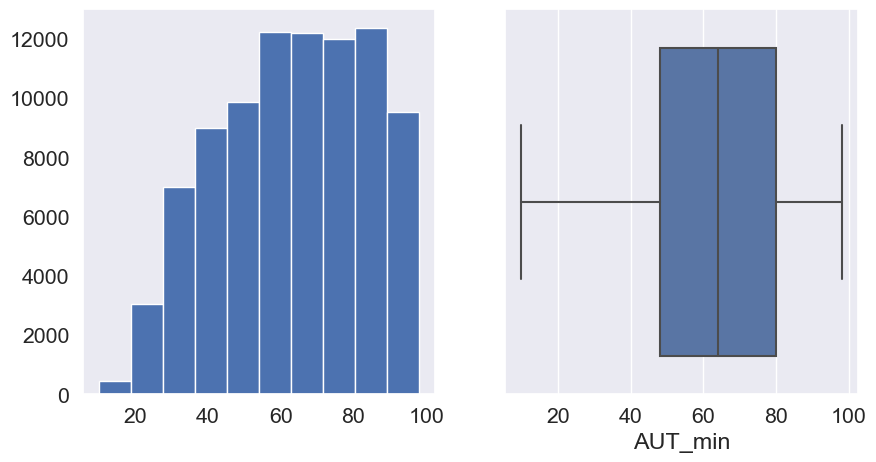

Column:  TEMP_MAX
Skew: 0.26
Kurtosis:  -0.42


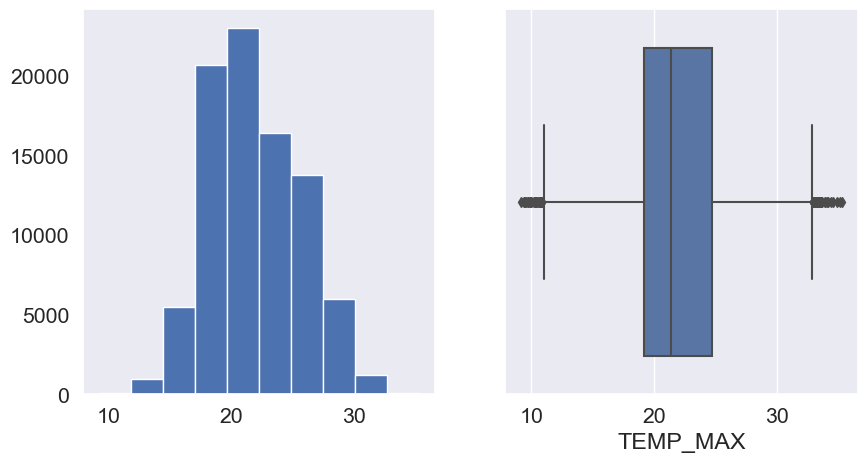

Column:  TEMP_MIN
Skew: 0.24
Kurtosis:  -0.12


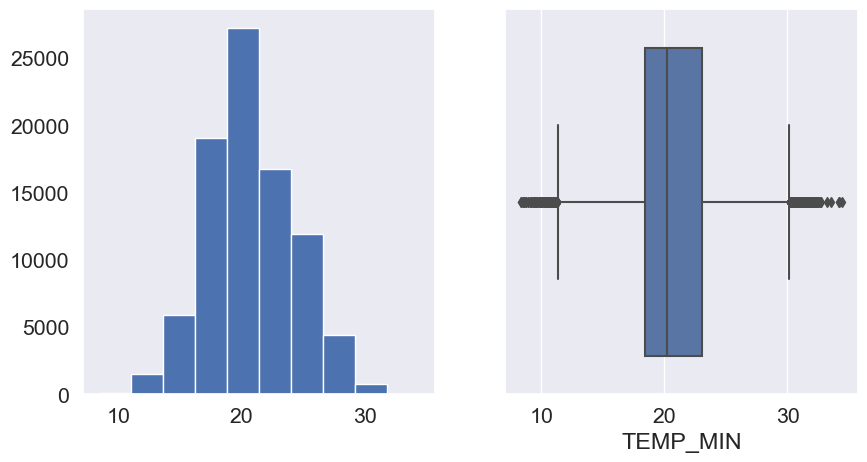

Column:  REL_DO
Skew: -0.35
Kurtosis:  -0.89


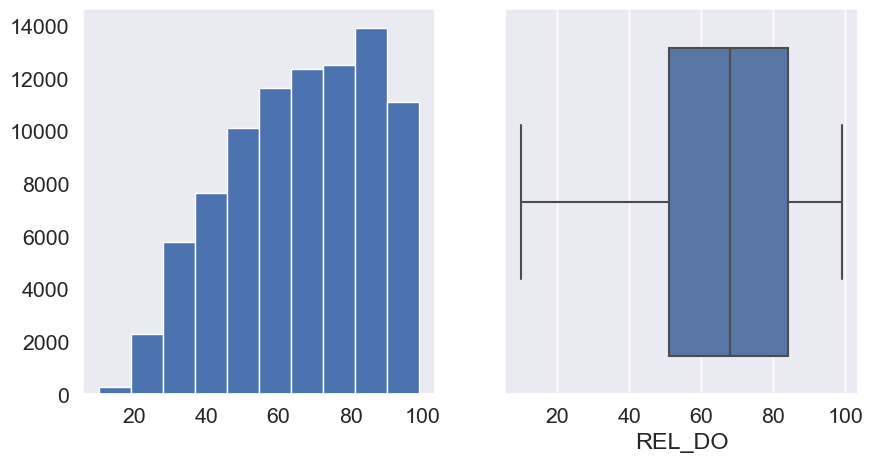

Column:  atm
Skew: 6.18
Kurtosis:  179.64


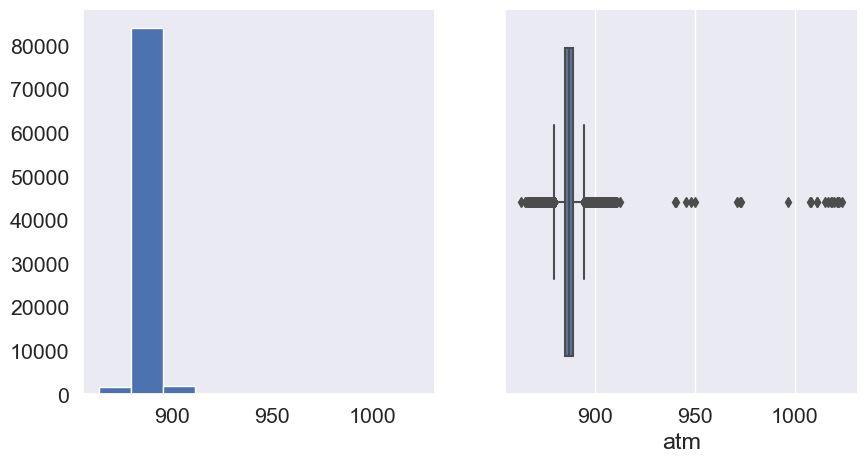

Column:  prec_total
Skew: 17.65
Kurtosis:  476.4


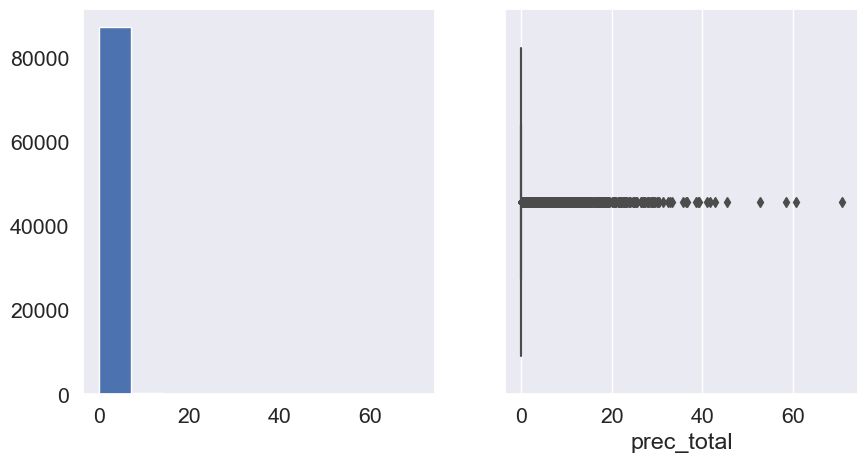

Column:  Viento_rajmax
Skew: 0.41
Kurtosis:  0.11


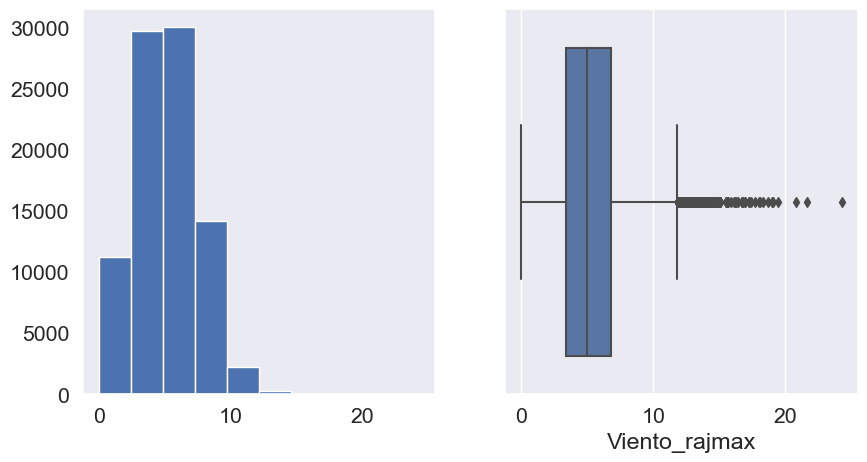

Column:  presion_max
Skew: 1.02
Kurtosis:  5.82


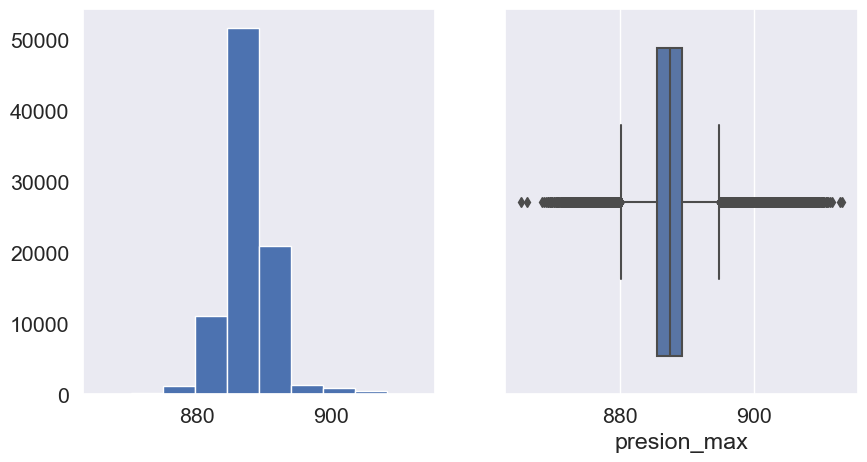

Column:  presion_min
Skew: 0.33
Kurtosis:  4.91


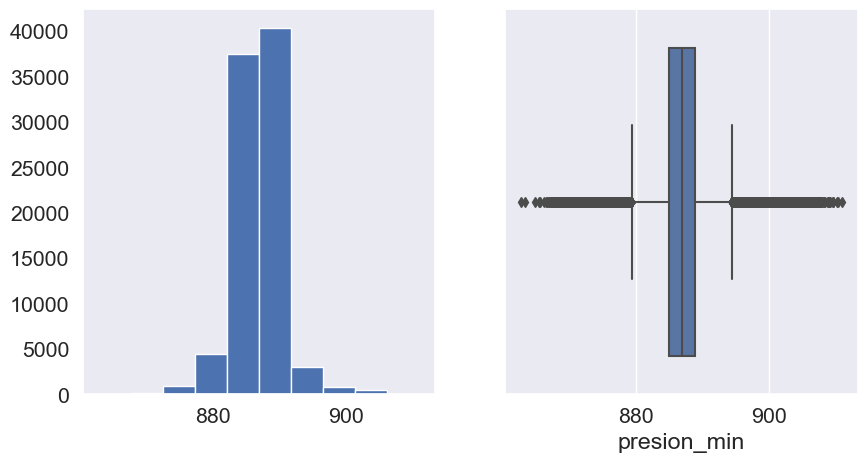

In [109]:
sns.set(font_scale=1.4)
for col in nume_cols:
    print('Column: ', col)
    print('Skew:', round(df2[col].skew(), 2))
    print('Kurtosis: ', round(df2[col].kurtosis(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df2[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[col])
    plt.show()

Vemos posibles datos atípicos en las variables presion_min, presion_max, prec_total, atm. 

La variable TEM_MIN muestra en el gráfico que posiblemente sigue una distribución normal. con un leve sesgo positivo (Mayor peso en la cola izquierda de la distribución), lo mismo ocurre con TEM_MAX.

La variable velocidad del viento se ve sesgada, con mayor pero en la cola izquierda, mientras que AUT_MAX Y aut_MIN muestran mayor peso en la cola derecha. 





La variable prec_total no evidencia que siga una distribución normal, los datos se concentran en la parte izquierda de la gráfica.

la variable Viento_rajmax también evidencia un sesgo positivo (skew>0)

se visualiza asimetría en varias variables, la variable TEM_MIN aunque está sesgada muestra un poco de simetría en comparación con las demás variables. 

# Análisis Bivariado

In [114]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y velocidad'%col)

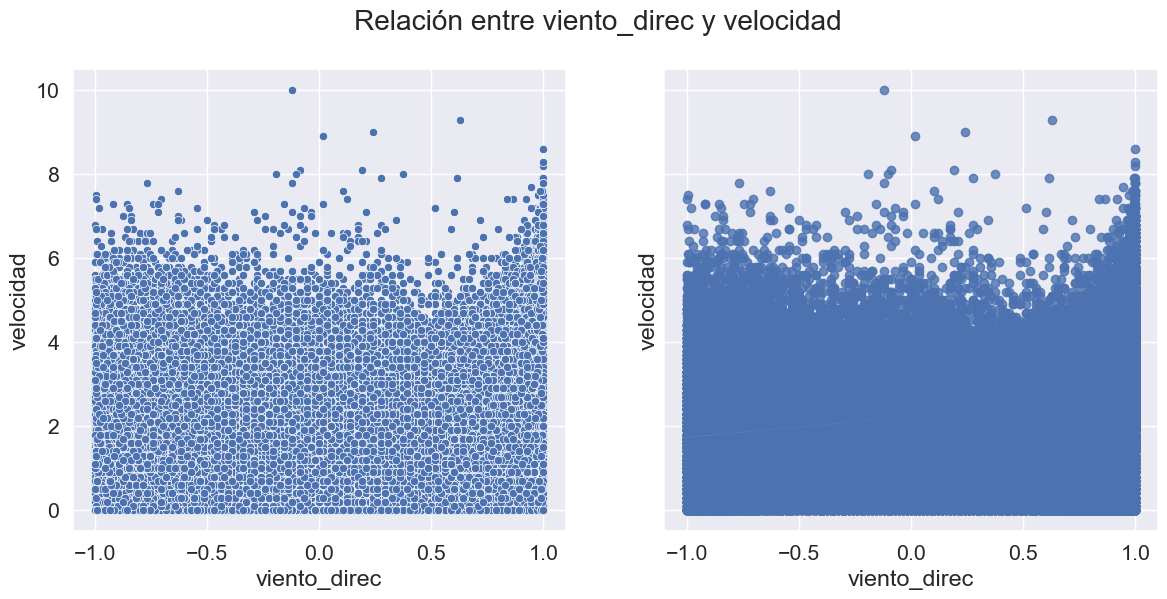

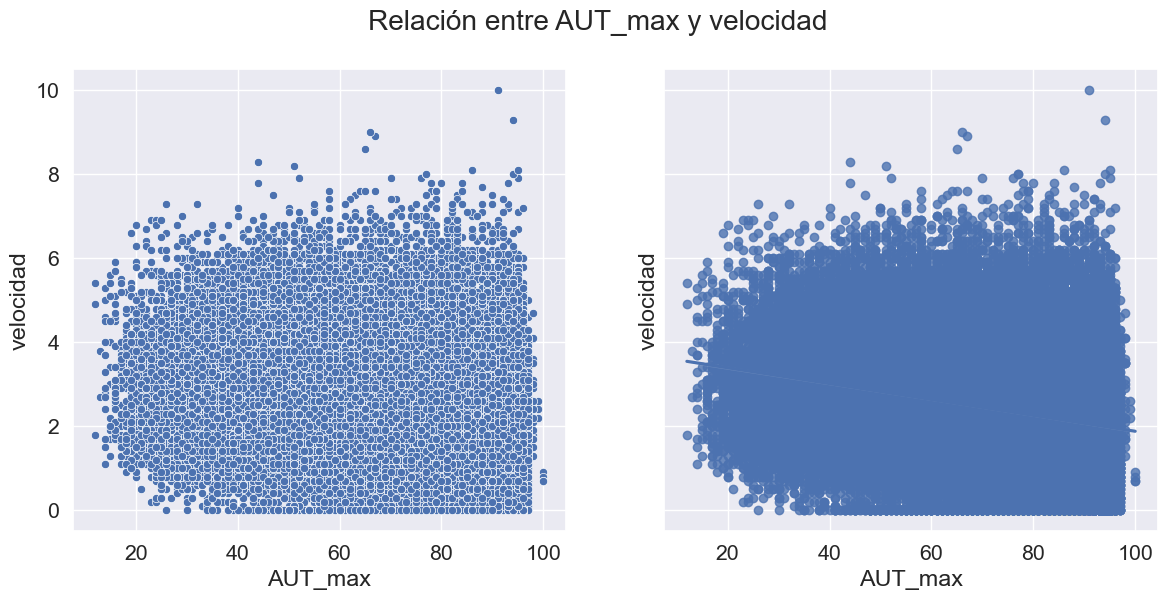

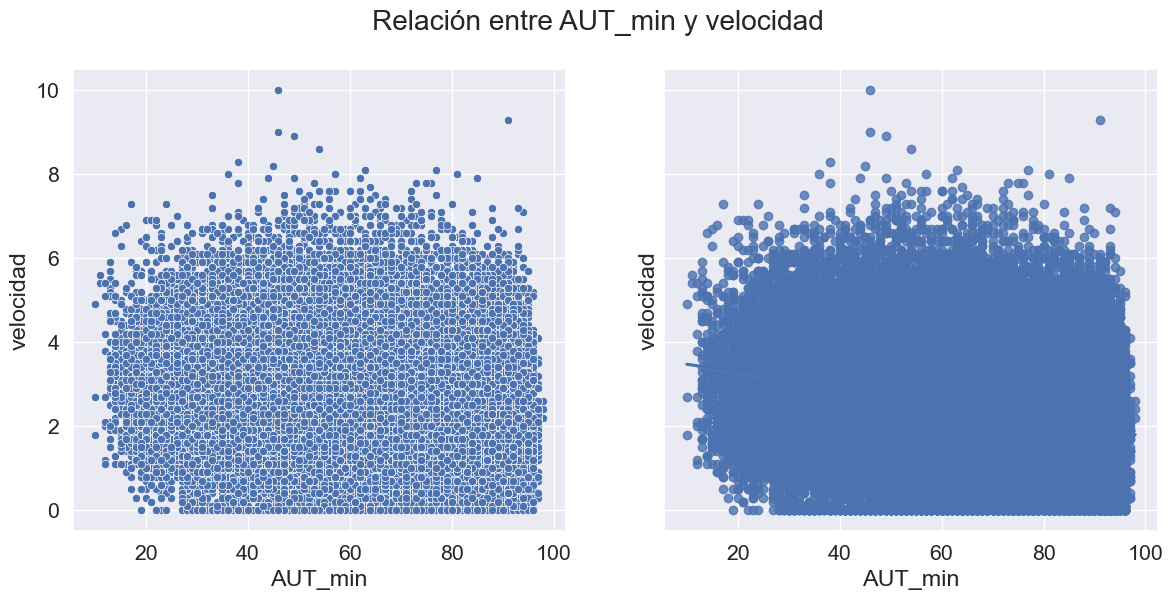

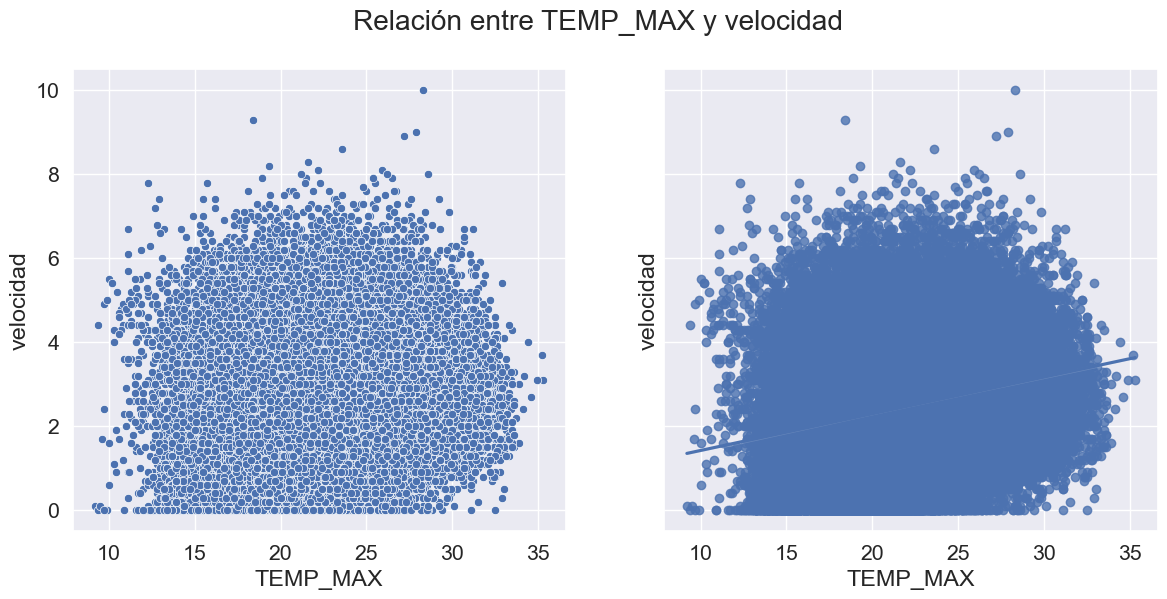

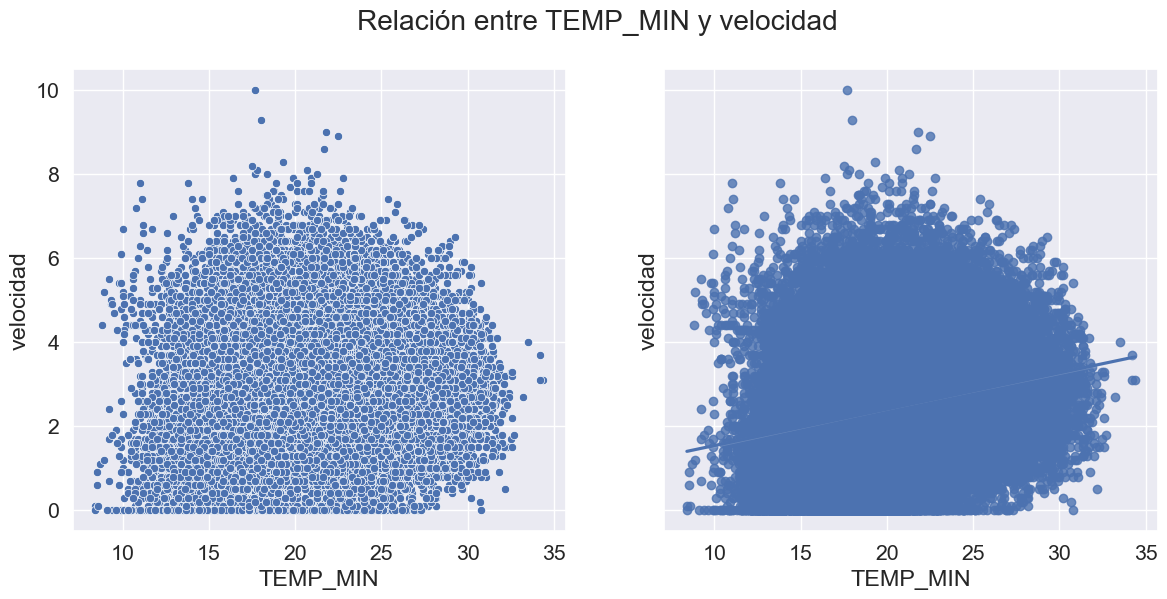

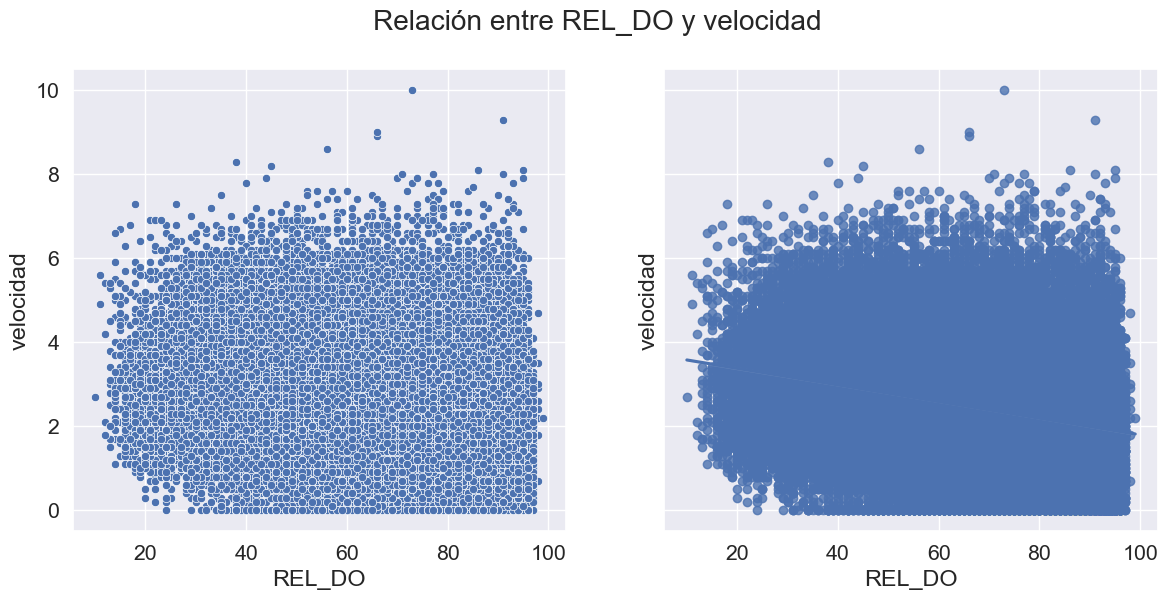

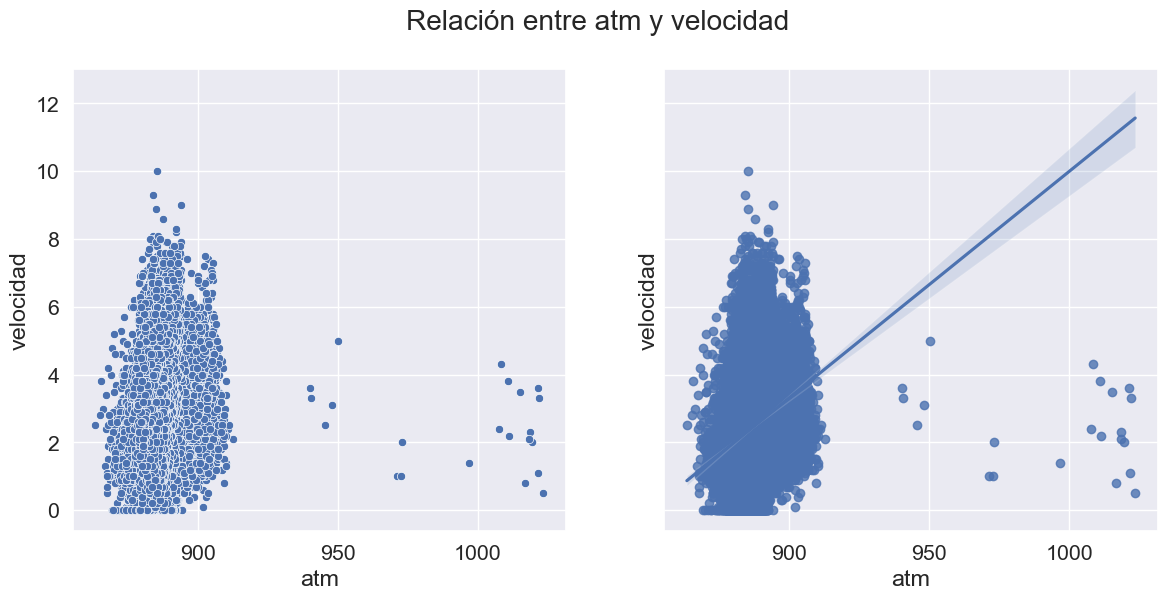

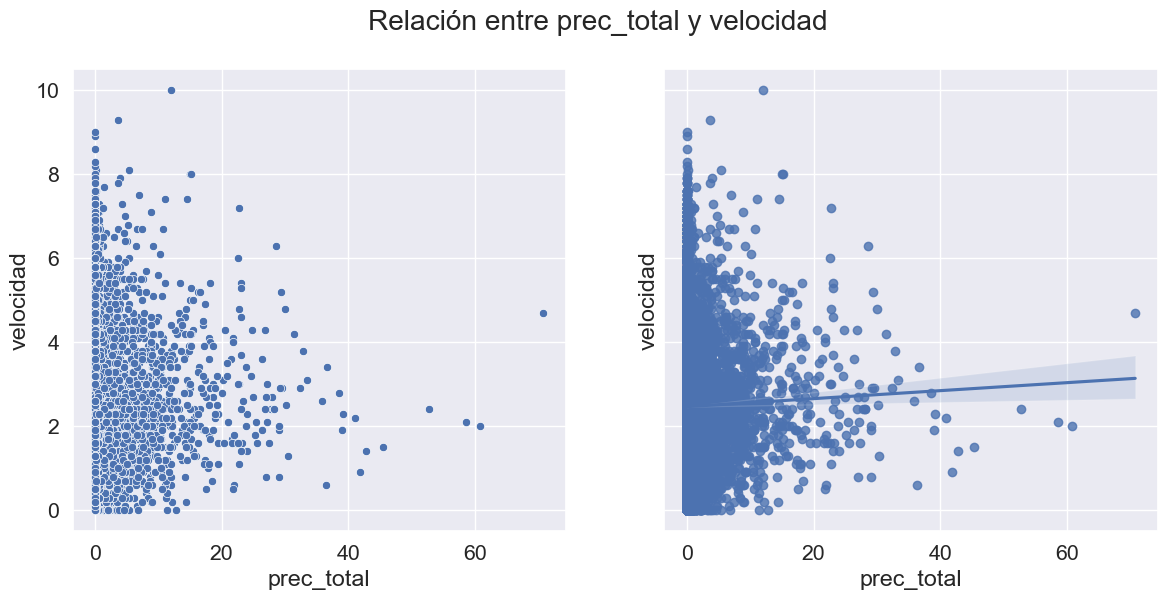

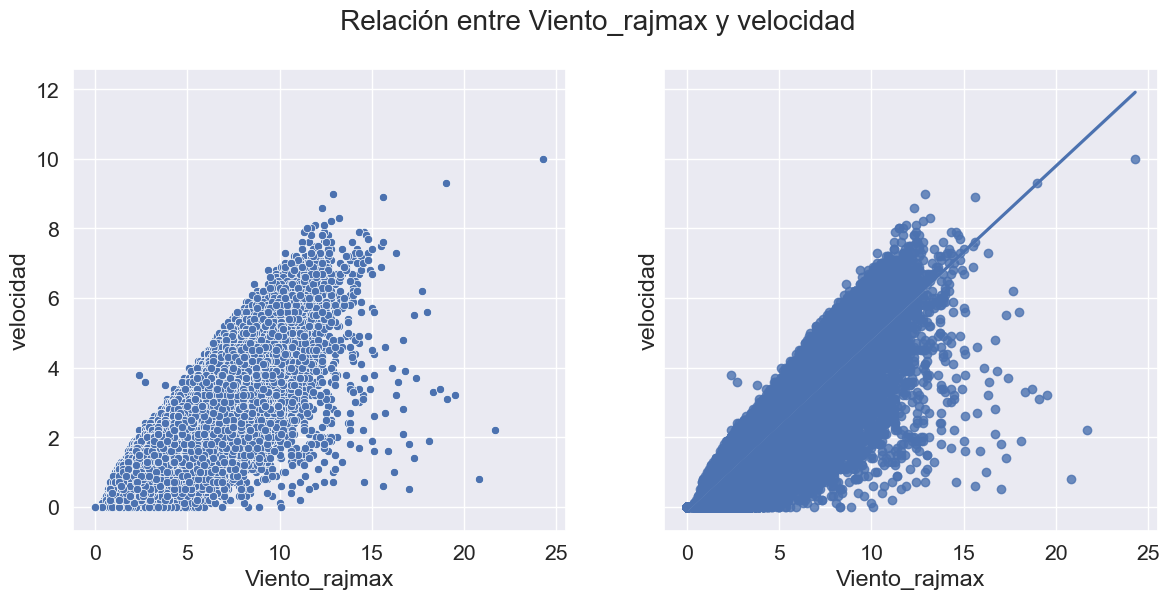

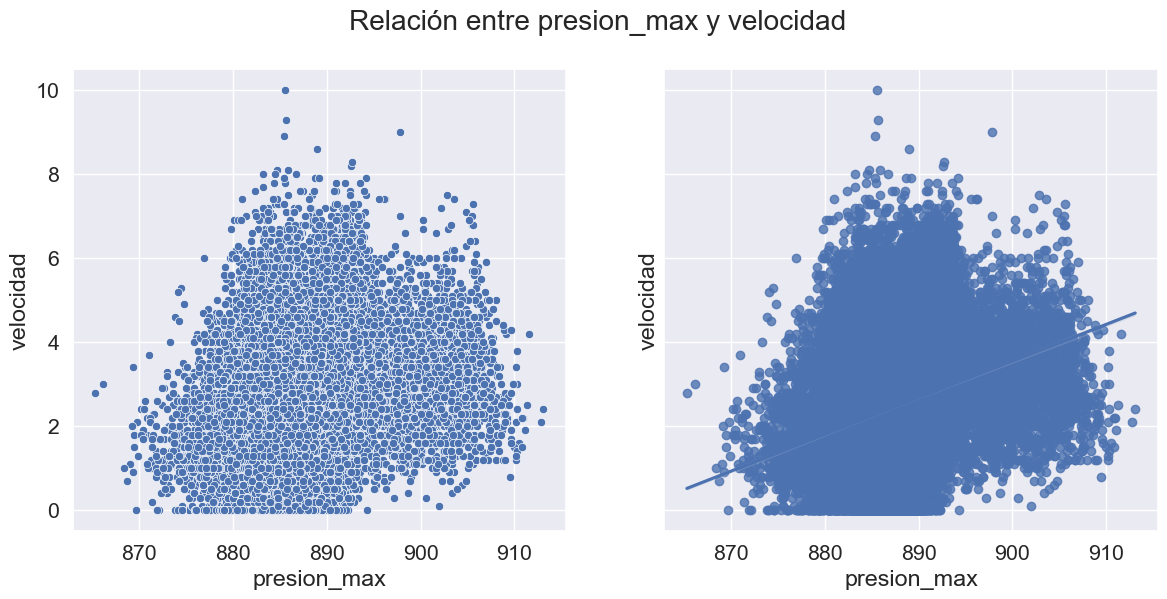

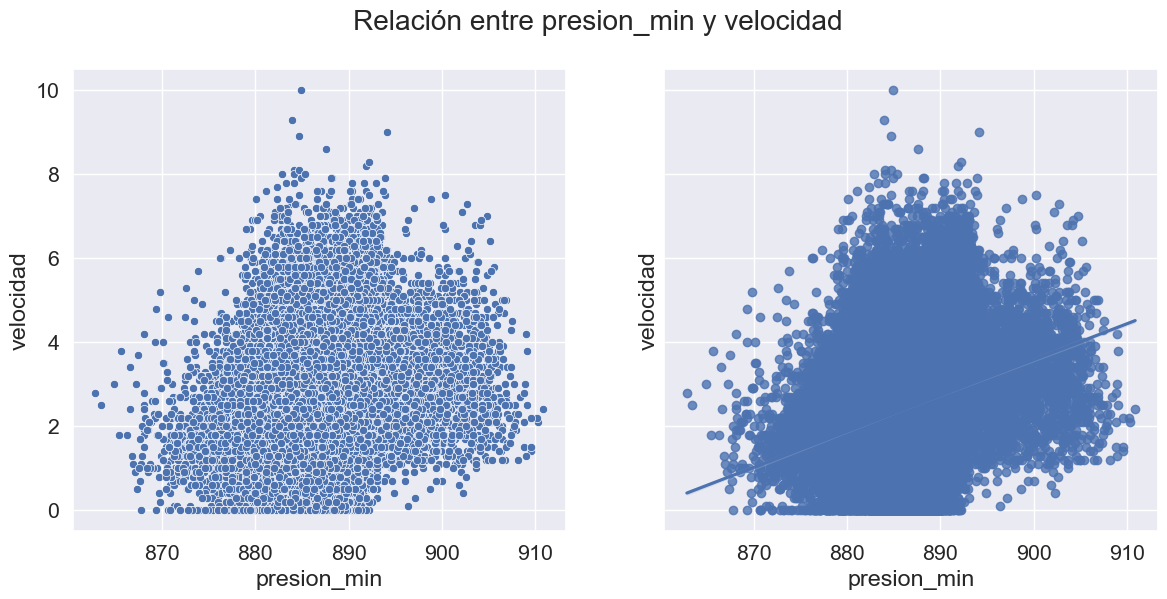

In [117]:
nume_cols.remove('velocidad')
for col in nume_cols:
    scatter_regplot(df2, col, 'velocidad')

Se realizo un trazado de scatterplot() , y regplot() con las variables explicativas numéricas. 

Velocidad del viento y presion_min muestran una relación lineal entre ellas, a medida que aumenta la presión tiende a aumentar la velocidad del viento. 
la misma tendencia se ve entre velocidad del viento y presion_max

se ve una relación lineal directa entre la variable velocidad y vientoraj_max , esto tiene sentido ya que a medida que aumenta este registro del viento, aumentarán la velocidad con la que se desplaza. Esta podría ser una variable apropiada a considerar al momento de realizar la predicción de la velocidad del viento



# Entre variables predictoras:


In [129]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y atm '%col)

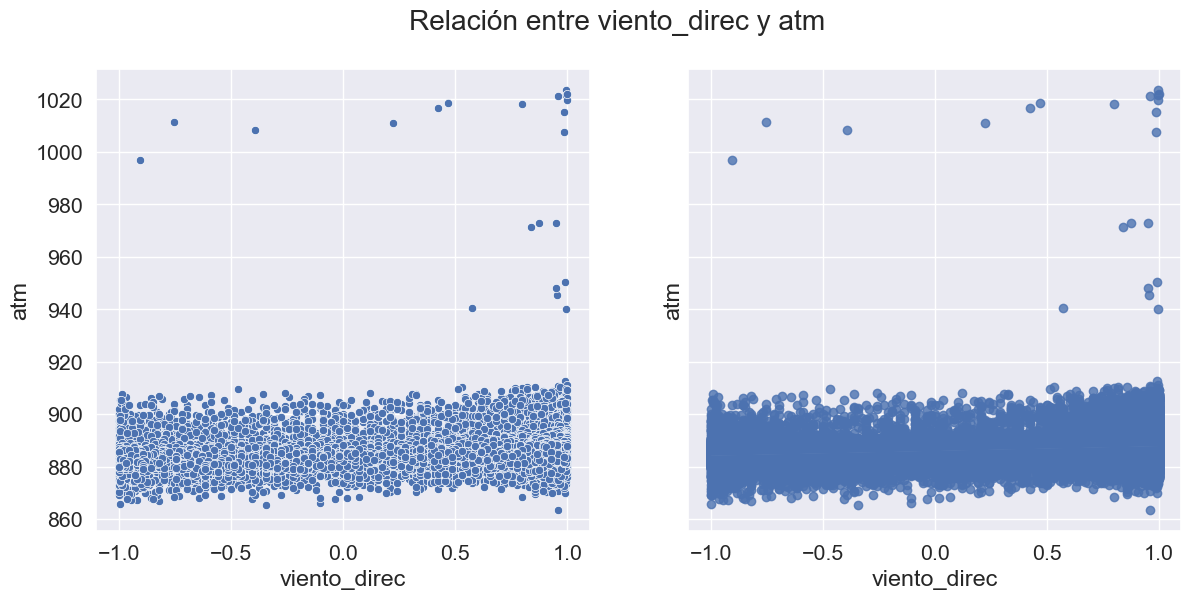

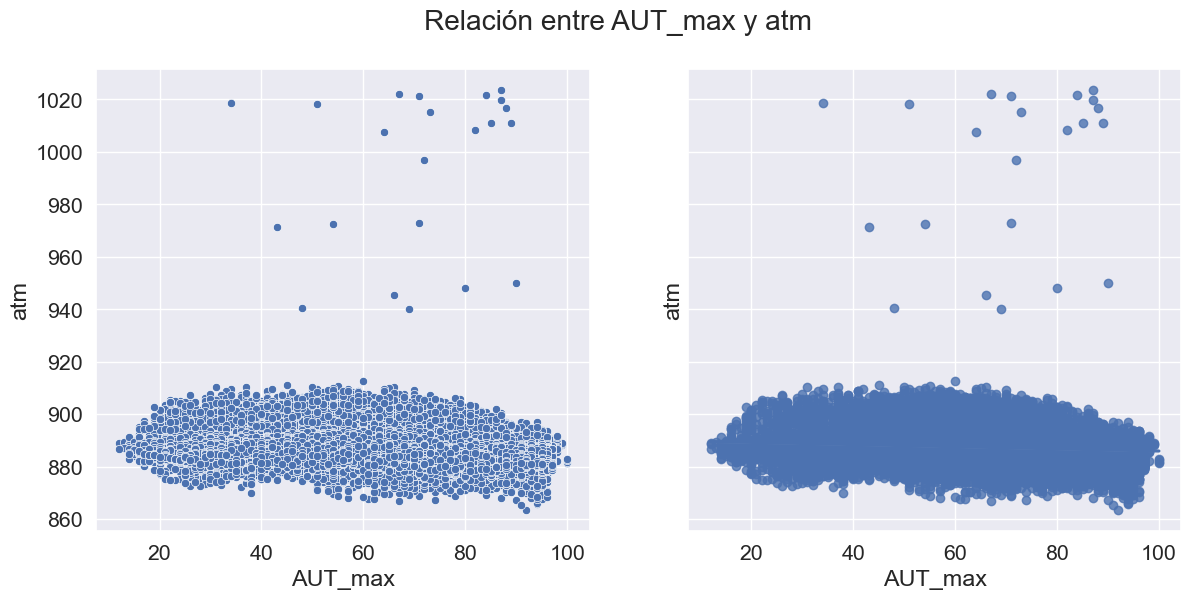

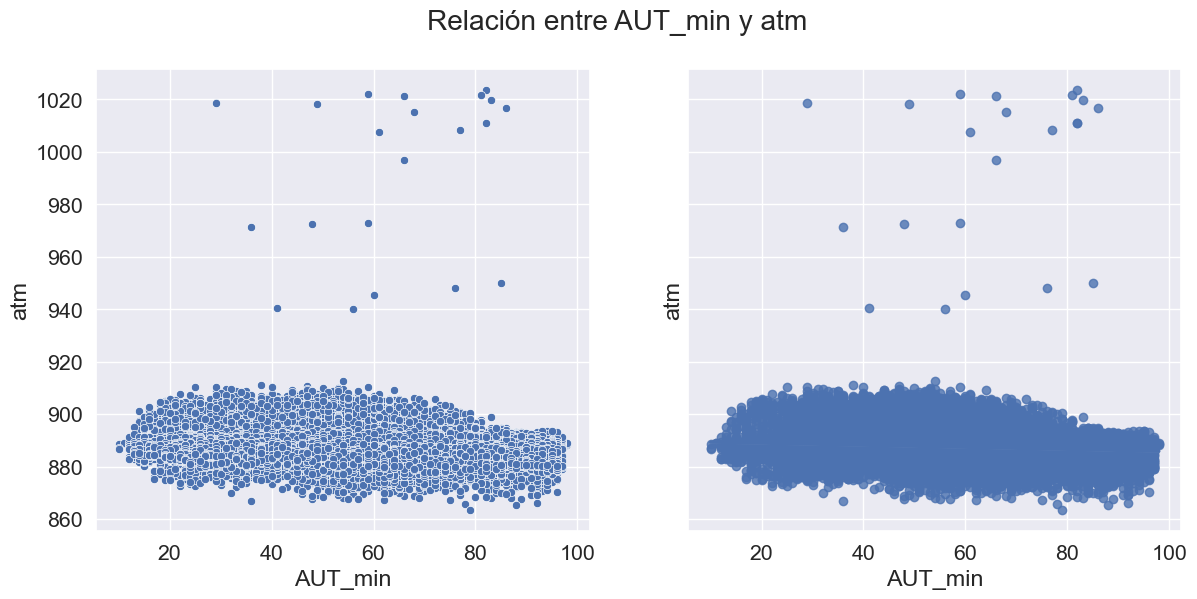

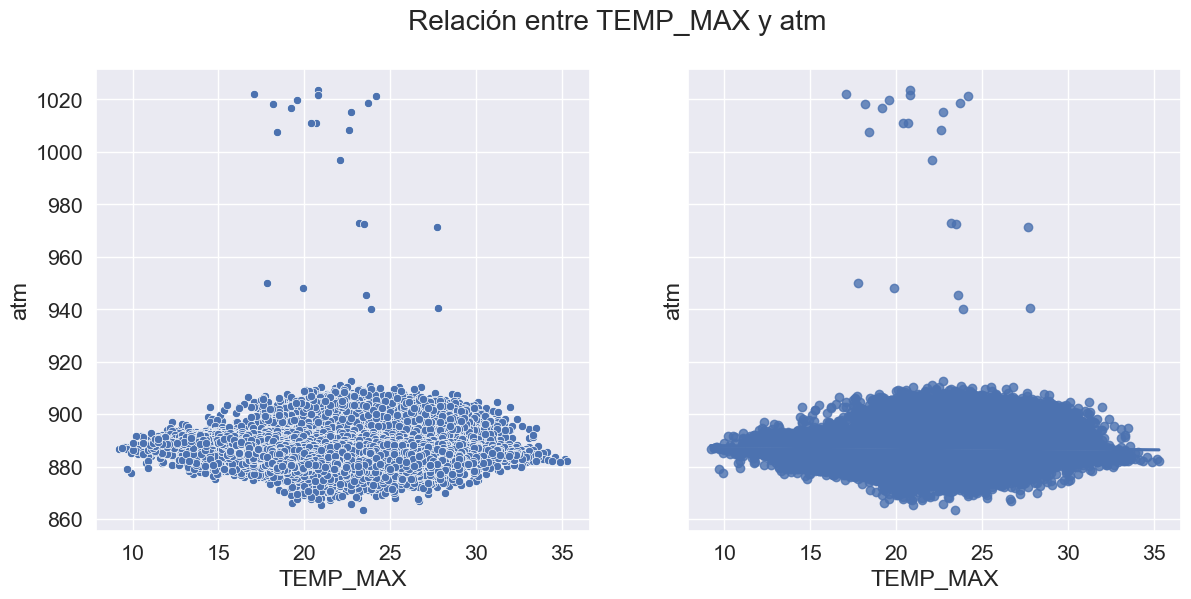

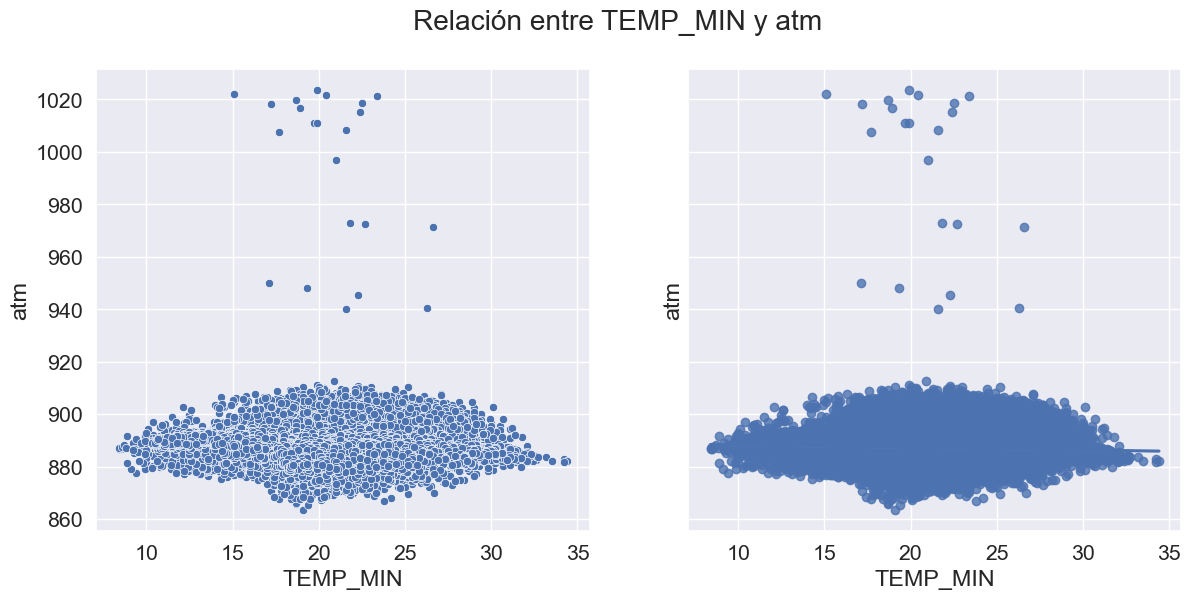

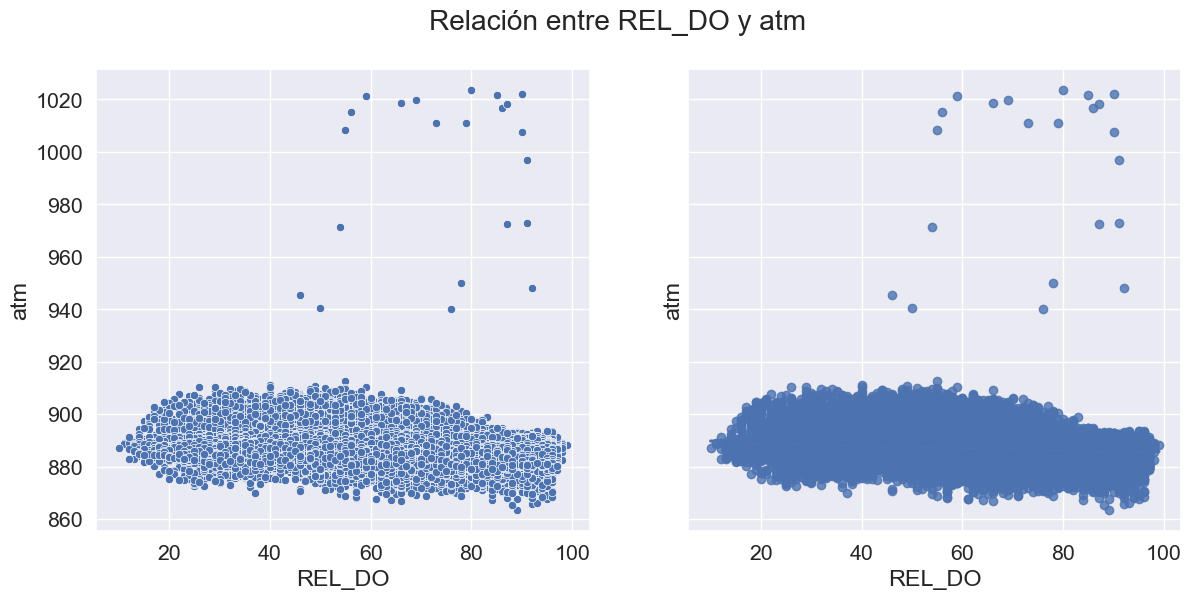

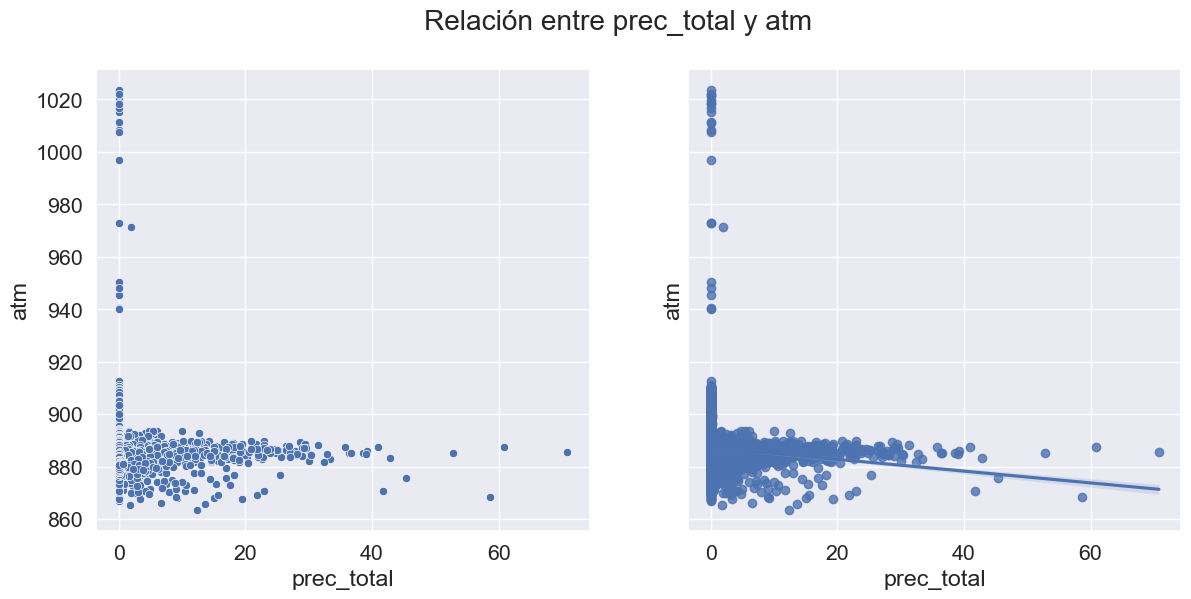

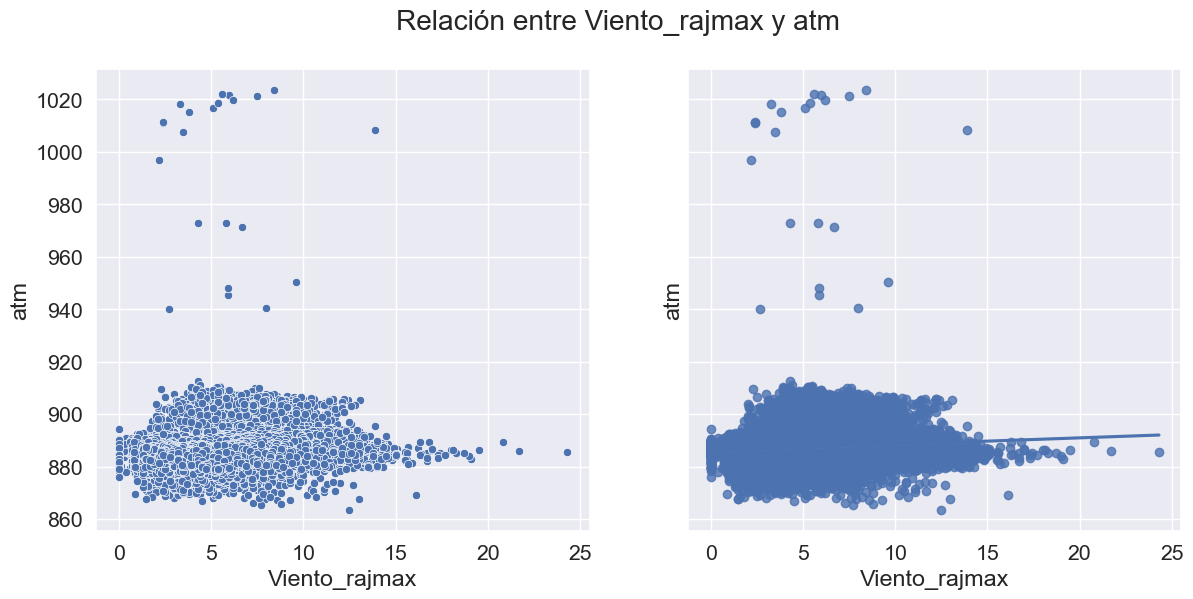

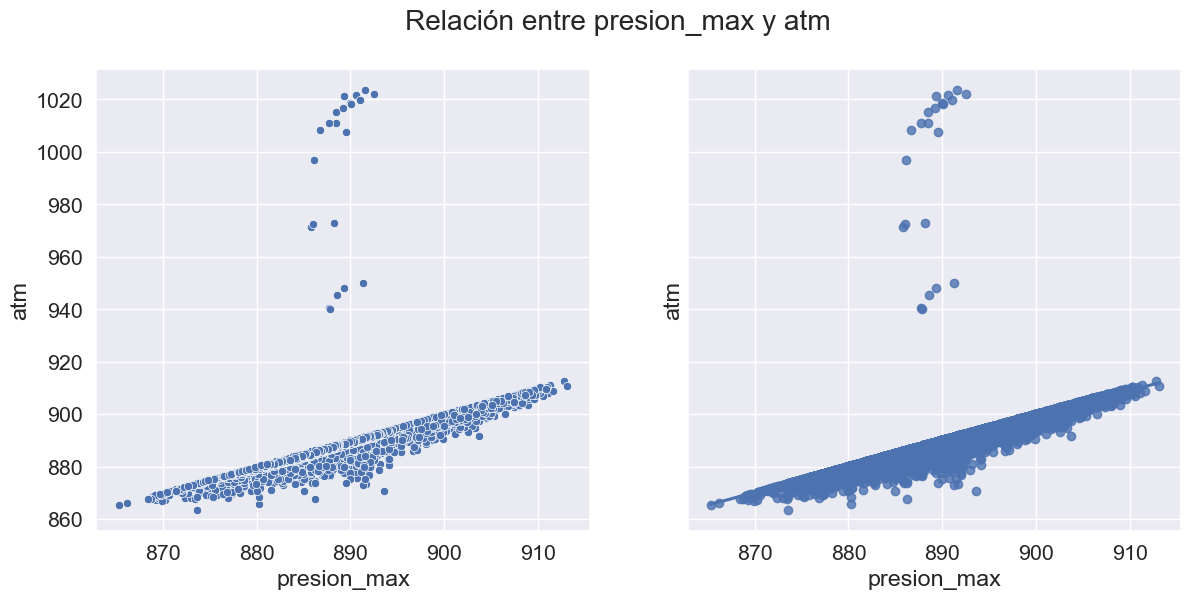

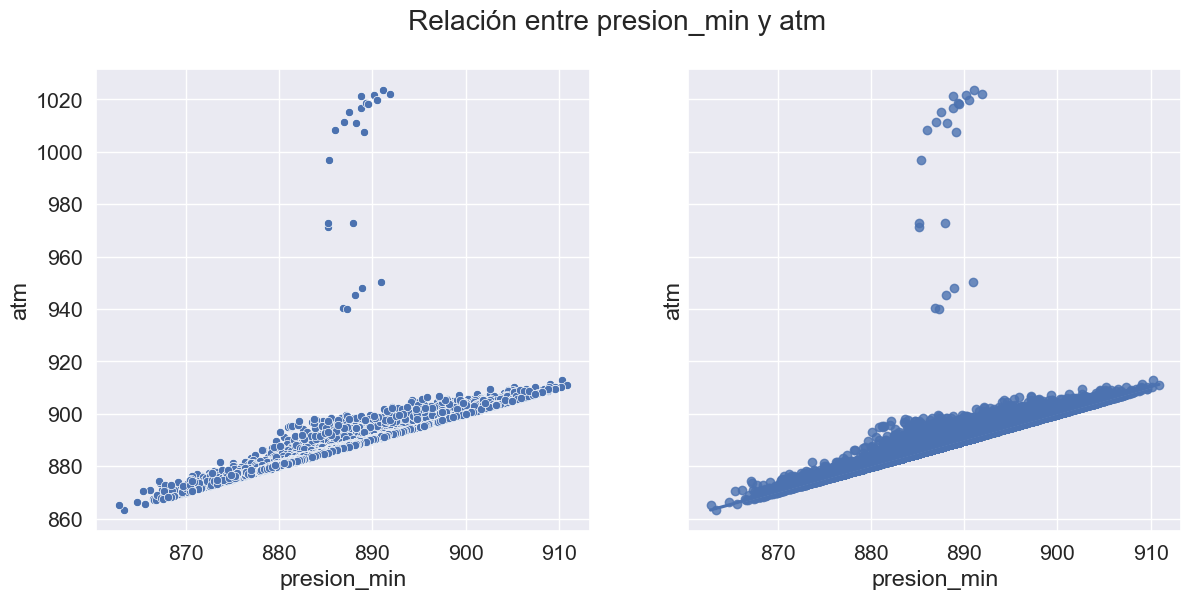

In [130]:
nume_cols.remove('atm')
for col in nume_cols:
    scatter_regplot(df2, col, 'atm')

Puede verse que a medida que se tienen mayores registros en de presion_max es porque hay una mayor presión atmosférica. 

Vemos que el registro de presion_min será mayor a medida que se encuentre en un espacio de mayor presión atmoférica, esto tiene sentido ya que si la presión atmosférica es alta las mediciones de presion_min irán aumentando.

Vemos que a mayores precipitaciones la presión atmosférica disminuye, sin embargo , es sabido que  si bien las precipitaciones pueden estar asociadas a sistemas de baja presión atmosférica, no causan directamente una disminución significativa de la presión atmosférica en una región en particular.

Se visualiza muy bien la tendencia lineal directa entre la variable presión atmoférica y los registros de presión máxima, esto tiene sentido pues a medida que aumente la presión atmosférica , los registros de presión_max aumentan

- Matriz de correlación

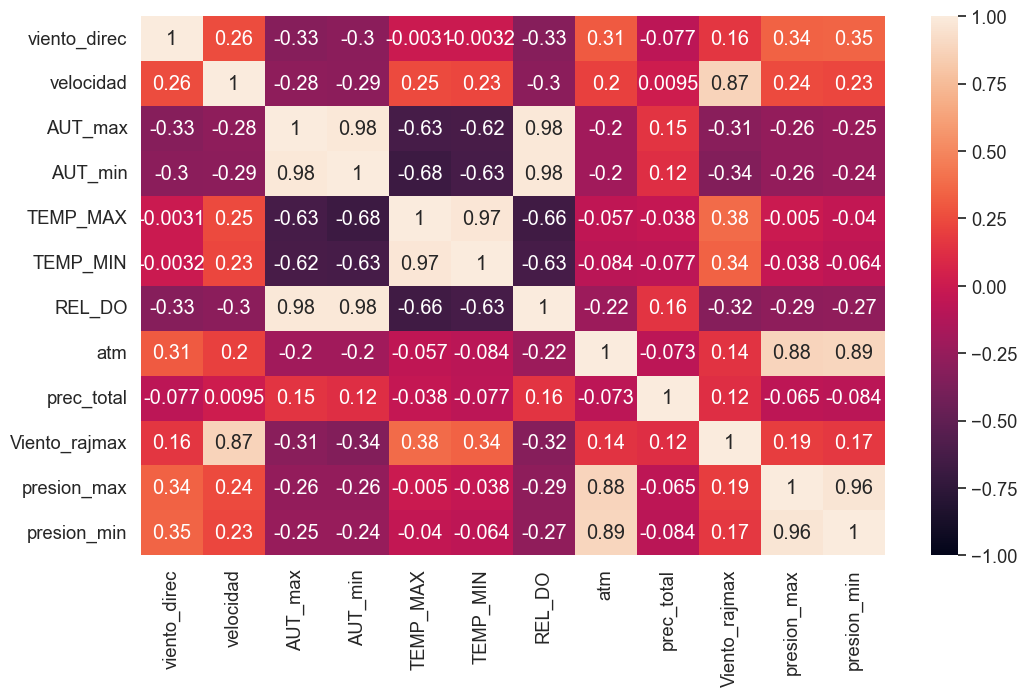

In [119]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 7))
sns.heatmap(df2.drop(['hora'],axis=1).corr(), annot = True, vmin = -1, vmax = 1);

De la matriz de correlación anterior puede verse que hay algunas variables que se encuentran correlacionadas. 

la variable REL_DO evidencia una moderada correlación con las variables TEMP_MAX y TEM_MIN.  De la misma manera hay una moderada correlación entre las variables TEMP_MAX y TEMP_MIN con  AUT_MAX, AUT_MIN. El resto de variables no evidencian una fuerte correlación entre ellas. 

# Modelos de Clasificación: 